In [3]:
library(tidyverse)
library(plotly)
library(latex2exp)
library(coda)
library(rjags)
library(glue)

# EXERCISE 1 

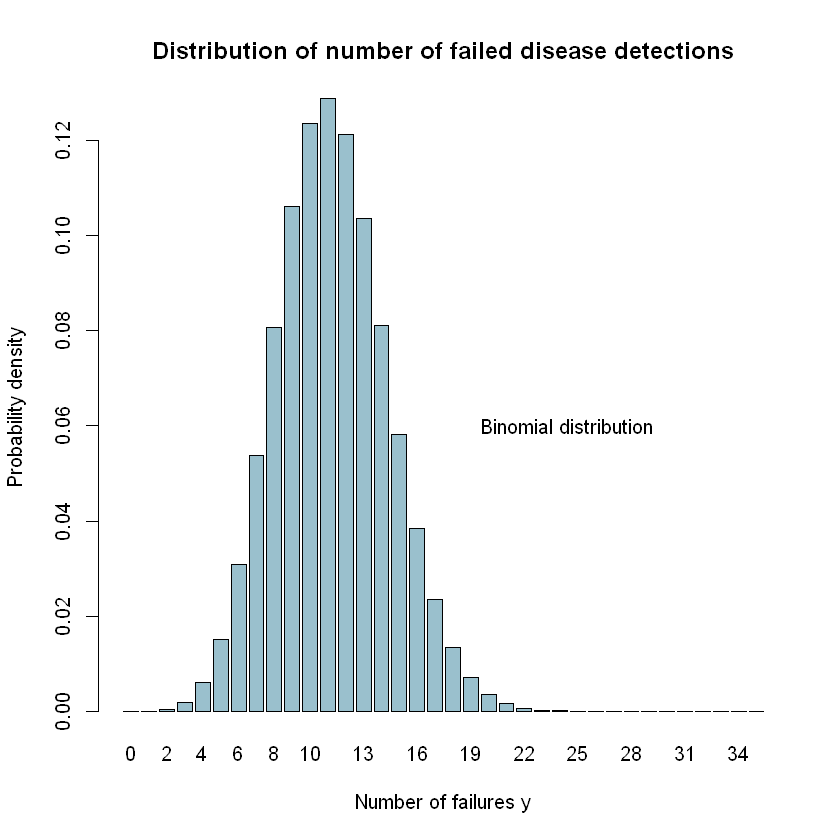

In [4]:
P_f <- 0.15 #Probability that test fails in detecting disease in an ill patient
n <- 75 #Number of randomly selected ill patients tested with the new method

x <- seq(0, 35)

#The number of failed disease detections with the new method is represented by a binomial distribution
barplot(dbinom(x, n, P_f), xlab = "Number of failures y", 
        ylab = "Probability density", 
        main = "Distribution of number of failed disease detections",
        names.arg = x, col = "lightblue3")

text(x=30, y=0.06, "Binomial distribution")

In [5]:
y <- 6 #Number of failures in detecting the ill in the 75 patients sample

p_f <- y / n

sprintf("The frequentist unbiased estimator of failure probability (that follows a binomial distribution) with the new method is: p_f = y / n = %f", p_f)

[1] "The frequentist unbiased estimator of failure probability (that follows a binomial distribution) with the new method is: p_f = y / n = 0.080000"

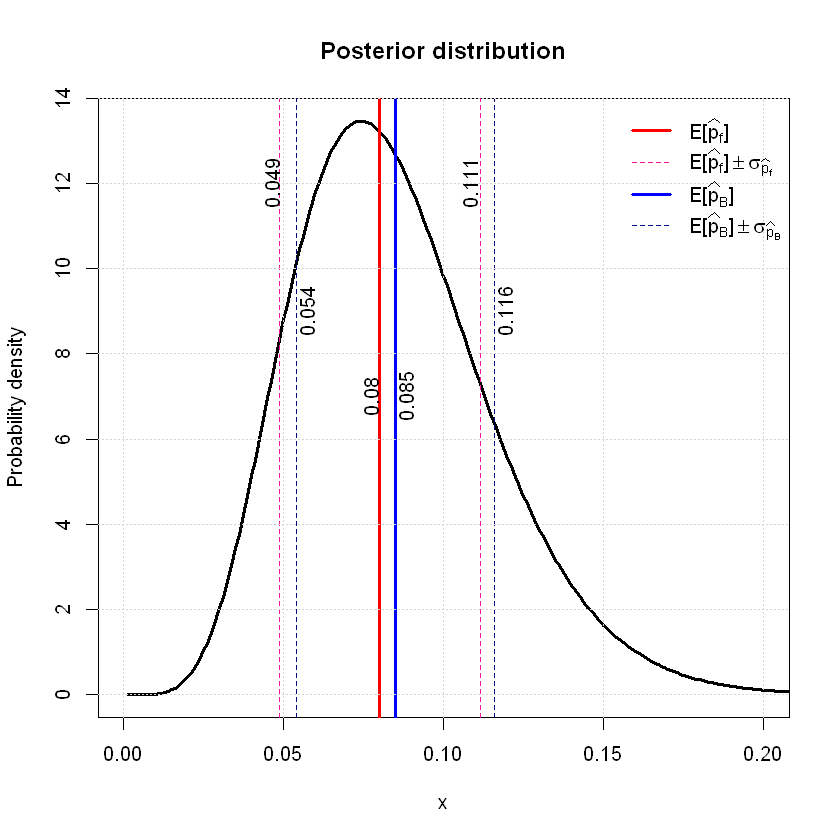

In [6]:
mu <- 0.15
std <- 0.14 
std_p_f <- sqrt((p_f * (1 - p_f)) / n)

a <- mu * (((mu / (std^2)) * (1 - mu)) - 1)
b <- ((1 - mu) / mu) * a

#Updated beta distribution parameters
a_prime <- a + y 
b_prime <- b + n - y

mu_prime <- a_prime / (a_prime + b_prime)
std_prime <- sqrt((a_prime * b_prime) / (((a_prime + b_prime)^2) * (a_prime + b_prime + 1)))

x <- seq(0, 1, 0.001)

post <- function(x){
    return(dbinom(y, n, x) * dbeta(x, a, b))
}

norm_post <- function(x){
    return(post(x) / integrate(post, 0, 1)$value)
}

plot(x, norm_post(x), xlab='x', ylab='Probability density', main='Posterior distribution',
     xlim=c(0,0.2), col='black', lwd=3, type = 'l')

abline(v=p_f, lwd=3, col='red')
abline(v=p_f-std_p_f, lwd=1, lty=2, col='deeppink')
abline(v=p_f+std_p_f, lwd=1, lty=2, col='deeppink')
abline(v=mu_prime, lwd=3, col='blue')
abline(v=mu_prime-std_prime, lwd=1, lty=2, col='navy')
abline(v=mu_prime+std_prime, lwd=1, lty=2, col='navy')

grid()

legend('topright', legend=c(TeX("$E \\[ \\widehat{p}_f \\]$"), TeX("$E \\[ \\widehat{p}_f \\] \\pm \\sigma_{\\widehat{p}_f}$"), TeX("$E \\[ \\widehat{p}_B \\]$"), TeX("$E \\[ \\widehat{p}_B \\] \\pm \\sigma_{\\widehat{p}_B}$")),
        col=c("red", "deeppink", "blue", "navy"), lty=c(1, 2, 1, 2), lwd=c(3, 1, 3, 1),
        bty = "n", cex=1)

text(x=round(p_f, 3)-0.003, y=7, round(p_f, 3), srt=90)
text(x=round(p_f - std_p_f, 3)-0.003, y=12, round(p_f - std_p_f, 3), srt=90)
text(x=round(p_f + std_p_f, 3)-0.003, y=12, round(p_f + std_p_f, 3), srt=90)
text(x=round(mu_prime, 3)+0.003, y=7, round(mu_prime, 3), srt=90)
text(x=round(mu_prime - std_prime, 3)+0.003, y=9, round(mu_prime - std_prime, 3), srt=90)
text(x=round(mu_prime + std_prime, 3)+0.003, y=9, round(mu_prime + std_prime, 3), srt=90)

In [7]:
#Hypothesys test, Bayesian approach
#p0 = P_f = 0,15 with the old method
#p = probability of failure with the new method
#NULL hypothesis H0: p >= p0
#Alternative hypothesis H1: p < p0
alpha <- 0.05 #Significance level
print(paste("Significance level alpha =", alpha * 100, "%"))

P_H0 <- 1 - integrate(norm_post, 0, 0.15)$value #Posterior probability of null hypothesis
print(paste("Posterior probability of the null hypothesis: P_H0 =", round(P_H0 * 100, 3), "%"))

print("P_H0 < alpha, thus we can reject the NULL hypothesis at the level of significance alpha. Meaning that, with a significance level alpha, the new test gives better results in detecting the disease in ill patients with respect to the older one.")

[1] "Significance level alpha = 5 %"
[1] "Posterior probability of the null hypothesis: P_H0 = 3.128 %"
[1] "P_H0 < alpha, thus we can reject the NULL hypothesis at the level of significance alpha. Meaning that, with a significance level alpha, the new test gives better results in detecting the disease in ill patients with respect to the older one."


[1] "y = 6 lies in the acceptance region of the graph, thus we do not reject the NULL hypothesis H0."


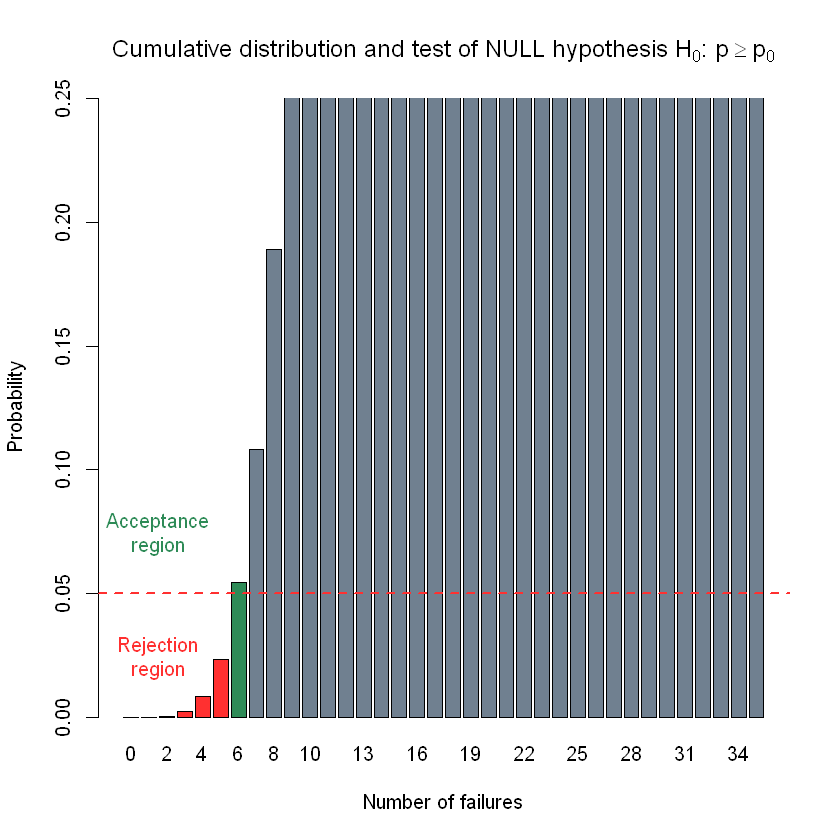

In [8]:
#Hypothesys test, frequentist approach
x <- seq(0, 35)
bins <- pbinom(x, n, P_f)
cols <- rep('slategray', 36)
cols <- replace(cols, c(1,2,3,4,5,6), 'firebrick1')
cols <- replace(cols, 7, 'seagreen')

barplot(bins, names.arg=x, xlab='Number of failures', ylab='Probability', 
        main=TeX('Cumulative distribution and test of NULL hypothesis $H_0: \\, p \\geq p_0$'), 
        ylim = c(0, 0.25), col=cols, xpd = FALSE)
abline(h=alpha, col ='firebrick1', lty=2, lwd=2)
text(x = 2.5, y = 0.025, "Rejection\nregion", col = "firebrick1", cex = 1)
text(x = 2.5, y = 0.075, "Acceptance\nregion", col = "seagreen", cex = 1)

print("y = 6 lies in the acceptance region of the graph, thus we do not reject the NULL hypothesis H0.")

In [9]:
#p-value calculation
p_val <- pbinom(y, n, P_f)
print(paste("The p-value is p_val =", p_val * 100, "%"))
print("Since the p-value is higher than the significance level, alpha, the test statistics lies in the acceptance region and we cannot reject the null hypothesis at the significance level of 5%")

[1] "The p-value is p_val = 5.43533033542315 %"
[1] "Since the p-value is higher than the significance level, alpha, the test statistics lies in the acceptance region and we cannot reject the null hypothesis at the significance level of 5%"


# EXERCISE 2 

In [10]:
mu <- seq(0, 1, 0.001)
n_death <- c(0, 1, 2, 3, 4)
n1 <- c(109, 65, 22, 3, 1)
n2 <- c(144, 91, 32, 11, 2)

#Assuming a uniform prior, the posterior is represented by a gamma function with parameters alpha = sum(n * n_death) + 1; lambda = sum(n)
alpha_u1 <- sum(n1 * n_death) + 1
lambda1 <- sum(n1)
post_u1 <- dgamma(mu, alpha_u1, lambda1)
alpha_u2 <- sum(n2 * n_death) + 1
lambda2 <- sum(n2)
post_u2 <- dgamma(mu, alpha_u2, lambda2)

#Assuming a Jeffrey's prior, the posterior is represented by a gamma function with parameters alpha = sum(n * n_death) + 0.5; lambda = sum(n)
alpha_j1 <- sum(n1 * n_death) + 0.5
post_j1 <- dgamma(mu, alpha_j1, lambda1)
alpha_j2 <- sum(n2 * n_death) + 0.5
post_j2 <- dgamma(mu, alpha_j2, lambda2)

#Means
mean_u1 <- alpha_u1 / lambda1
mean_u2 <- alpha_u2 / lambda2
mean_j1 <- alpha_j1 / lambda1
mean_j2 <- alpha_j2 / lambda2

#Medians
med_u1 <- qgamma(0.5, alpha_u1, lambda1)
med_u2 <- qgamma(0.5, alpha_u2, lambda2)
med_j1 <- qgamma(0.5, alpha_j1, lambda1)
med_j2 <- qgamma(0.5, alpha_j2, lambda2)

#Variances
var_u1 <- alpha_u1 / (lambda1^2)
var_u2 <- alpha_u2 / (lambda2^2)
var_j1 <- alpha_j1 / (lambda1^2)
var_j2 <- alpha_j2 / (lambda2^2)

#Standard deviations
std_u1 <- sqrt(var_u1)
std_u2 <- sqrt(var_u2)
std_j1 <- sqrt(var_j1)
std_j2 <- sqrt(var_j2)

#95% credibility intervals
ci_l_u1 <- qgamma(0.025, alpha_u1, lambda1)
ci_r_u1 <- qgamma(0.975, alpha_u1, lambda1)
ci_l_u2 <- qgamma(0.025, alpha_u2, lambda2)
ci_r_u2 <- qgamma(0.975, alpha_u2, lambda2)
ci_l_j1 <- qgamma(0.025, alpha_j1, lambda1)
ci_r_j1 <- qgamma(0.975, alpha_j1, lambda1)
ci_l_j2 <- qgamma(0.025, alpha_j2, lambda2)
ci_r_j2 <- qgamma(0.975, alpha_j2, lambda2)

In [11]:
cat("SUMMARY OF CALCULATED RESULTS:\n")
cat("\n=========================\n")
cat("UNIFORM prior, FIRST corp")
cat("\n=========================\n")
cat("Mean: ", round(mean_u1, 3))
cat("\nMedian: ", round(med_u1, 3))
cat("\nVariance: ", round(var_u1, 3))
cat("\nStandard deviation: ", round(std_u1, 3))
cat("\n95% credibility interval: [", round(ci_l_u1, 3), ":", round(ci_r_u1, 3), "]")
cat("\n===========================\n")
cat("JEFFREY\'s prior, FIRST corp")
cat("\n===========================\n")
cat("Mean: ", round(mean_j1, 3))
cat("\nMedian: ", round(med_j1, 3))
cat("\nVariance: ", round(var_j1, 3))
cat("\nStandard deviation: ", round(std_j1, 3))
cat("\n95% credibility interval: [", round(ci_l_j1, 3), ":", round(ci_r_j1, 3), "]")
cat("\n==========================\n")
cat("UNIFORM prior, SECOND corp")
cat("\n==========================\n")
cat("Mean: ", round(mean_u2, 3))
cat("\nMedian: ", round(med_u2, 3))
cat("\nVariance: ", round(var_u2, 3))
cat("\nStandard deviation: ", round(std_u2, 3))
cat("\n95% credibility interval: [", round(ci_l_u2, 3), ":", round(ci_r_u2, 3), "]")
cat("\n============================\n")
cat("JEFFREY\'s prior, SECOND corp")
cat("\n============================\n")
cat("Mean: ", round(mean_j2, 3))
cat("\nMedian: ", round(med_j2, 3))
cat("\nVariance: ", round(var_j2, 3))
cat("\nStandard deviation: ", round(std_j2, 3))
cat("\n95% credibility interval: [", round(ci_l_j2, 3), ":", round(ci_r_j2, 3), "]")

SUMMARY OF CALCULATED RESULTS:

UNIFORM prior, FIRST corp
Mean:  0.615
Median:  0.613
Variance:  0.003
Standard deviation:  0.055
95% credibility interval: [ 0.511 : 0.728 ]
JEFFREY's prior, FIRST corp
Mean:  0.612
Median:  0.611
Variance:  0.003
Standard deviation:  0.055
95% credibility interval: [ 0.509 : 0.726 ]
UNIFORM prior, SECOND corp
Mean:  0.704
Median:  0.702
Variance:  0.003
Standard deviation:  0.05
95% credibility interval: [ 0.609 : 0.805 ]
JEFFREY's prior, SECOND corp
Mean:  0.702
Median:  0.701
Variance:  0.003
Standard deviation:  0.05
95% credibility interval: [ 0.607 : 0.803 ]

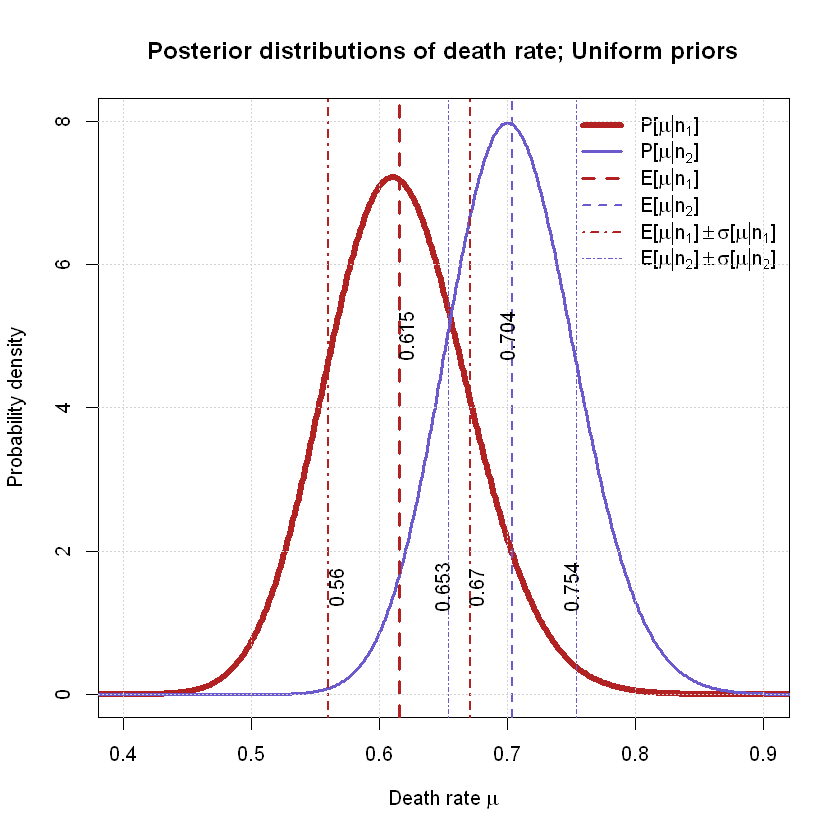

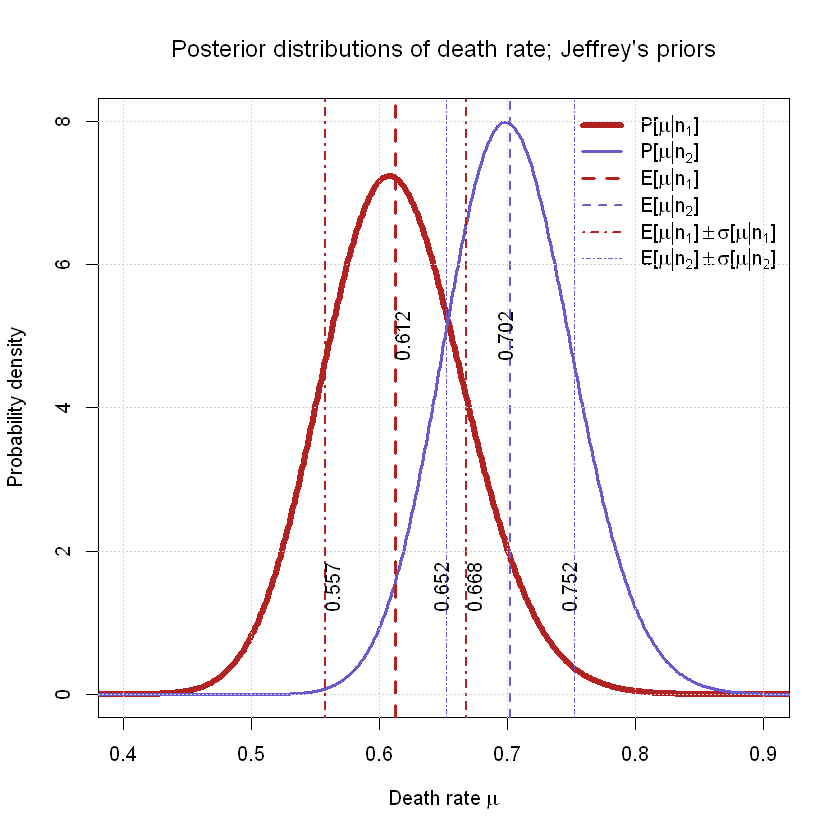

In [12]:
#Plotting
plot(mu, post_u1, type='l', xlab=TeX('Death rate $\\mu$'), ylab='Probability density', 
     main='Posterior distributions of death rate; Uniform priors', 
     xlim=c(0.4, 0.9), ylim=c(0, 8), col='firebrick', lwd=5)
lines(mu, post_u2, type='l', col='slateblue', lwd=3)
abline(v=mean_u1, lwd=3, col='firebrick', lty=2)
abline(v=mean_u1 - std_u1, lwd=2, col='firebrick', lty=4)
abline(v=mean_u1 + std_u1, lwd=2, col='firebrick', lty=4)
abline(v=mean_u2, lwd=2, col='slateblue', lty=2)
abline(v=mean_u2 - std_u2, lwd=1, col='slateblue', lty=4)
abline(v=mean_u2 + std_u2, lwd=1, col='slateblue', lty=4)
legend('topright', legend=c(TeX('$P \\[ \\mu | n_1 \\]$'), TeX('$P \\[ \\mu | n_2 \\]$'), TeX('$E \\[ \\mu | n_1 \\]$'), TeX('$E \\[ \\mu | n_2 \\]$'), TeX('$E \\[ \\mu | n_1 \\] \\pm \\sigma \\[ \\mu | n_1\\]$'), TeX('$E \\[ \\mu | n_2 \\] \\pm \\sigma \\[ \\mu | n_2\\]$')),
       col=c("firebrick", "slateblue", "firebrick", "slateblue", "firebrick", "slateblue"),
       lty=c(1, 1, 2, 2, 4, 4), lwd=c(5, 3, 3, 2, 2, 1), bty = "n", cex=1)
grid()
text(x=round(mean_u1, 3)+0.005, y=5, round(mean_u1, 3), srt=90)
text(x=round(mean_u1-std_u1, 3)+0.005, y=1.5, round(mean_u1-std_u1, 3), srt=90)
text(x=round(mean_u1+std_u1, 3)+0.005, y=1.5, round(mean_u1+std_u1, 3), srt=90)
text(x=round(mean_u2, 3)-0.005, y=5, round(mean_u2, 3), srt=90)
text(x=round(mean_u2-std_u2, 3)-0.005, y=1.5, round(mean_u2-std_u2, 3), srt=90)
text(x=round(mean_u2+std_u2, 3)-0.005, y=1.5, round(mean_u2+std_u2, 3), srt=90)

plot(mu, post_j1, type='l', xlab=TeX('Death rate $\\mu$'), ylab='Probability density', 
     main=TeX('Posterior distributions of death rate; Jeffrey\'s priors'),
     xlim=c(0.4, 0.9), ylim=c(0, 8), col='firebrick', lwd=5)
lines(mu, post_j2, type='l', col='slateblue', lwd=3)
abline(v=mean_j1, lwd=3, col='firebrick', lty=2)
abline(v=mean_j1 - std_j1, lwd=2, col='firebrick', lty=4)
abline(v=mean_j1 + std_j1, lwd=2, col='firebrick', lty=4)
abline(v=mean_j2, lwd=2, col='slateblue', lty=2)
abline(v=mean_j2 - std_j2, lwd=1, col='slateblue', lty=4)
abline(v=mean_j2 + std_j2, lwd=1, col='slateblue', lty=4)
legend('topright', legend=c(TeX('$P \\[ \\mu | n_1 \\]$'), TeX('$P \\[ \\mu | n_2 \\]$'), TeX('$E \\[ \\mu | n_1 \\]$'), TeX('$E \\[ \\mu | n_2 \\]$'), TeX('$E \\[ \\mu | n_1 \\] \\pm \\sigma \\[ \\mu | n_1\\]$'), TeX('$E \\[ \\mu | n_2 \\] \\pm \\sigma \\[ \\mu | n_2\\]$')),
       col=c("firebrick", "slateblue", "firebrick", "slateblue", "firebrick", "slateblue"),
       lty=c(1, 1, 2, 2, 4, 4), lwd=c(5, 3, 3, 2, 2, 1), bty = "n", cex=1)
grid()
text(x=round(mean_j1, 3)+0.005, y=5, round(mean_j1, 3), srt=90)
text(x=round(mean_j1-std_j1, 3)+0.005, y=1.5, round(mean_j1-std_j1, 3), srt=90)
text(x=round(mean_j1+std_j1, 3)+0.005, y=1.5, round(mean_j1+std_j1, 3), srt=90)
text(x=round(mean_j2, 3)-0.005, y=5, round(mean_j2, 3), srt=90)
text(x=round(mean_j2-std_j2, 3)-0.005, y=1.5, round(mean_j2-std_j2, 3), srt=90)
text(x=round(mean_j2+std_j2, 3)-0.005, y=1.5, round(mean_j2+std_j2, 3), srt=90)

# EXERCISE 3

In [13]:
n <- 116   #Total number of water samples
y <- 11    #Number of samples with high bacter level
#p = probability that a sample of water has a high bacter level

p_f <- y / n
sprintf("The frequentist estimator for the probability for a given water sample to present a high bacter level is: p_f = y / n = %f", p_f)

[1] "The frequentist estimator for the probability for a given water sample to present a high bacter level is: p_f = y / n = 0.094828"

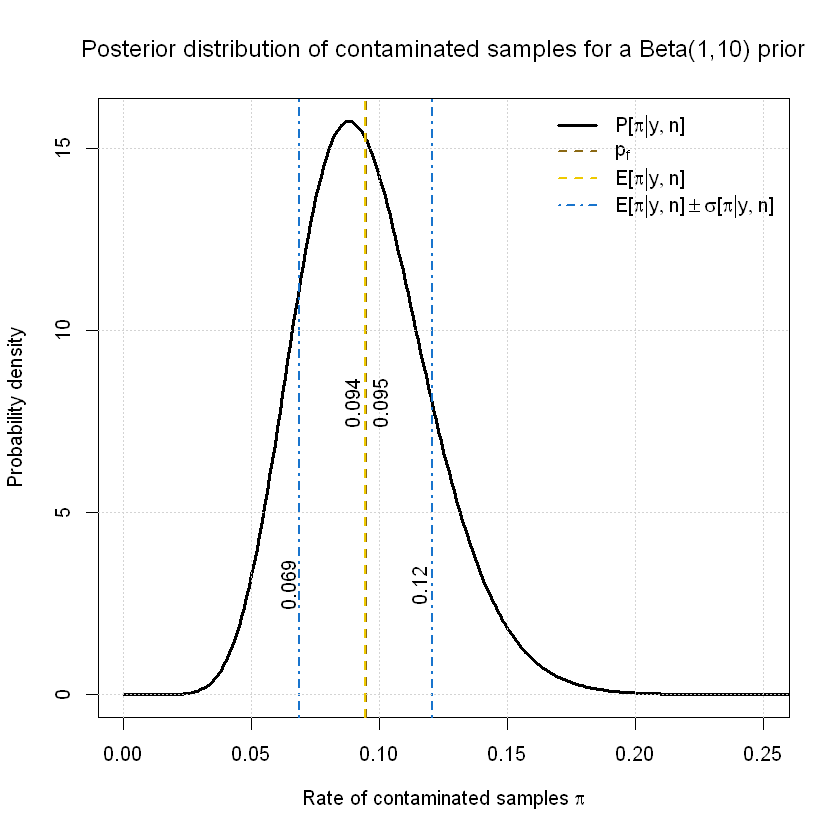

In [14]:
#Assuming the likelihood to be binomial for the given problem, with p being the probability of "success", n the total number of trials (water samples) and y the number of "successes" (namely, the number of samples with an high bacter level) and assuming the prior to be a Beta function with parameters alpha_p = 1 and beta_p = 10; The posterior is represented by another (conjugate) Beta function with parameters alpha_c = alpha_p + y and beta_c = beta_p + n - y

alpha_p <- 1
beta_p <- 10

alpha_c <- alpha_p + y
beta_c <- beta_p + n - y

mean_c <- alpha_c / (alpha_c + beta_c)
var_c <- (alpha_c * beta_c) / (((alpha_c + beta_c)^2) * (alpha_c + beta_c + 1))
std_c <- sqrt(var_c)
ci_l_c <- qbeta(0.025, alpha_c, beta_c)
ci_r_c <- qbeta(0.975, alpha_c, beta_c)

x <- seq(0, 1, 0.001)

plot(x, dbeta(x, alpha_c, beta_c), type='l', 
     xlab=TeX('Rate of contaminated samples $\\pi$'), ylab='Probability density', 
     main=TeX('Posterior distribution of contaminated samples for a Beta(1,10) prior'), 
     xlim=c(0, 0.25), col='black', lwd=3)
abline(v=p_f, lwd=2, col='goldenrod4', lty=2)
abline(v=mean_c, lwd=2, col='gold2', lty=2)
abline(v=mean_c - std_c, lwd=2, col='dodgerblue3', lty=4)
abline(v=mean_c + std_c, lwd=2, col='dodgerblue3', lty=4)
legend('topright', legend=c(TeX('$P \\[ \\pi | y, n \\]$'), TeX('$p_f$'), TeX('$E \\[ \\pi | y, n \\]$'), TeX('$E \\[ \\pi | y, n \\] \\pm \\sigma \\[ \\pi | y, n\\]$')),
       col=c("black", "goldenrod4", "gold2", "dodgerblue3"),
       lty=c(1, 2, 2, 4), lwd=c(3, 2, 2, 2), bty = "n", cex=1)
grid()
text(x=round(p_f, 3)+0.005, y=8, round(p_f, 3), srt=90)
text(x=round(mean_c, 3)-0.005, y=8, round(mean_c, 3), srt=90)
text(x=round(mean_c - std_c, 3)-0.005, y=3, round(mean_c - std_c, 3), srt=90)
text(x=round(mean_c + std_c, 3)-0.005, y=3, round(mean_c + std_c, 3), srt=90)

In [15]:
cat("=============================\n")
cat("SUMMARY OF CALCULATED RESULTS")
cat("\n=============================\n")
cat("Mean of the posterior (in our convention coincides with the Bayesian estimator of p): ", round(mean_c, 3))
cat("\nVariance: ", round(var_c, 3))
cat("\nStandard deviation: ", round(std_c, 3))
cat("\n95% credibility interval: [", round(ci_l_c, 3), ":", round(ci_r_c, 3), "]")

SUMMARY OF CALCULATED RESULTS
Mean of the posterior (in our convention coincides with the Bayesian estimator of p):  0.094
Variance:  0.001
Standard deviation:  0.026
95% credibility interval: [ 0.05 : 0.151 ]

In [16]:
#Hypothesis testing, Bayesian approach
#p = probability that water sample is contaminated
#NULL hypothesis H0: p = 0.1
#Alternative hypothesis H1: p != 0.1
#Level of significance fixed at 5%

#It's proper to use a two-sided hypothesis test. With the Bayesian approach it is necessary to just check whether p = 0.1 lies inside the 95% credibility interval
p <- 0.1

cat("\n95% credibility interval: [", round(ci_l_c, 3), ":", round(ci_r_c, 3), "]\n")
cat("p = ", p)
cat("\nThe value of p lies inside the 95% credibility interval, thus we cannot reject the NULL hypothesis at 5% level of significance.")


95% credibility interval: [ 0.05 : 0.151 ]
p =  0.1
The value of p lies inside the 95% credibility interval, thus we cannot reject the NULL hypothesis at 5% level of significance.

Keeping into account the discretization of y, the level of significance as close to 5% as possible is:  4.254 %

y = 11 lies inside the acceptance region of the graph, thus we do not reject the NULL hypothesis H0 with the 5% level of significance.

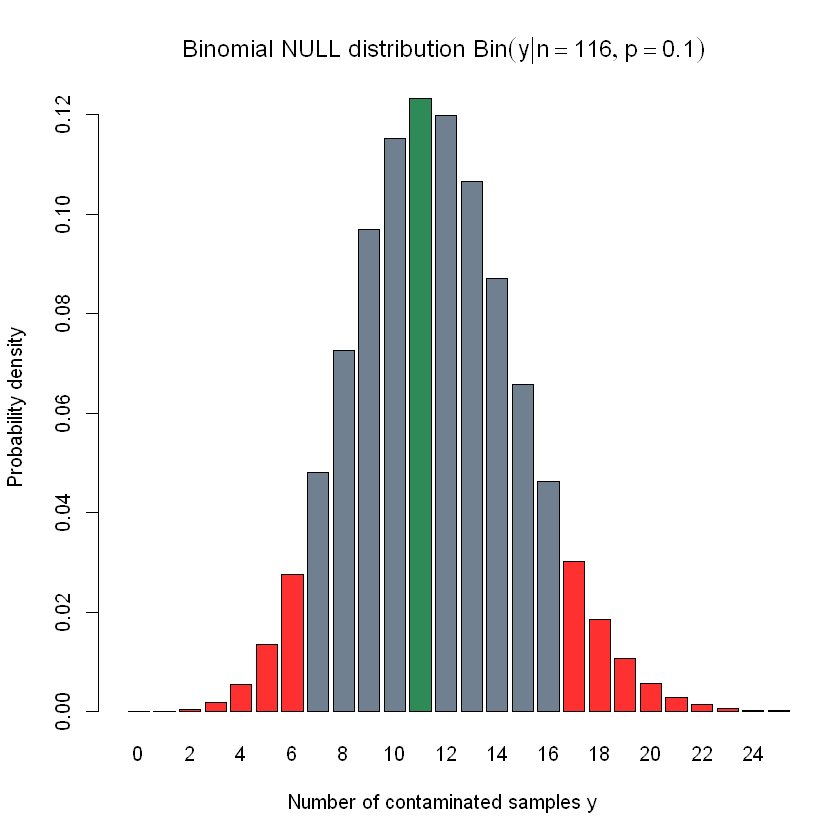

In [17]:
#Hypothesis testing, frequentist approach

#In defining the rejection region it is important to take into account that y has a discrete distribution, choosing the level of significance as close to 5% as possible

x <- seq(0, n)
bins <- dbinom(x, n, p)
l <- qbinom(0.025, n, p)
r <- qbinom(0.975, n, p)
alpha_dis <- 1 - sum(dbinom(l:r, n, p))

cat("Keeping into account the discretization of y, the level of significance as close to 5% as possible is: ", round(alpha_dis * 100, 3), "%\n\n")

cols <- rep('slategray', n+1)
cols <- replace(cols, seq(min(x), l+1), 'firebrick1')
cols <- replace(cols, seq(r, max(x)+1), 'firebrick1')
cols <- replace(cols, y+1, 'seagreen')

barplot(bins, names.arg=x, xlab='Number of contaminated samples y', 
        ylab='Probability density', 
        main=TeX('Binomial NULL distribution $Bin ( y | n = 116, p = 0.1 )$'), 
        xlim = c(0, 30), xpd = FALSE, col=cols)

cat("y = 11 lies inside the acceptance region of the graph, thus we do not reject the NULL hypothesis H0 with the 5% level of significance.")

In [18]:
#New measurement is performed

n2 <- 165
y2 <- 9

p_f2 <- y2 / n2
sprintf("The frequentist estimator for the probability for a given water sample to present a high bacter level, given the new measurement, is: p_f = y / n = %f", p_f2)

[1] "The frequentist estimator for the probability for a given water sample to present a high bacter level, given the new measurement, is: p_f = y / n = 0.054545"

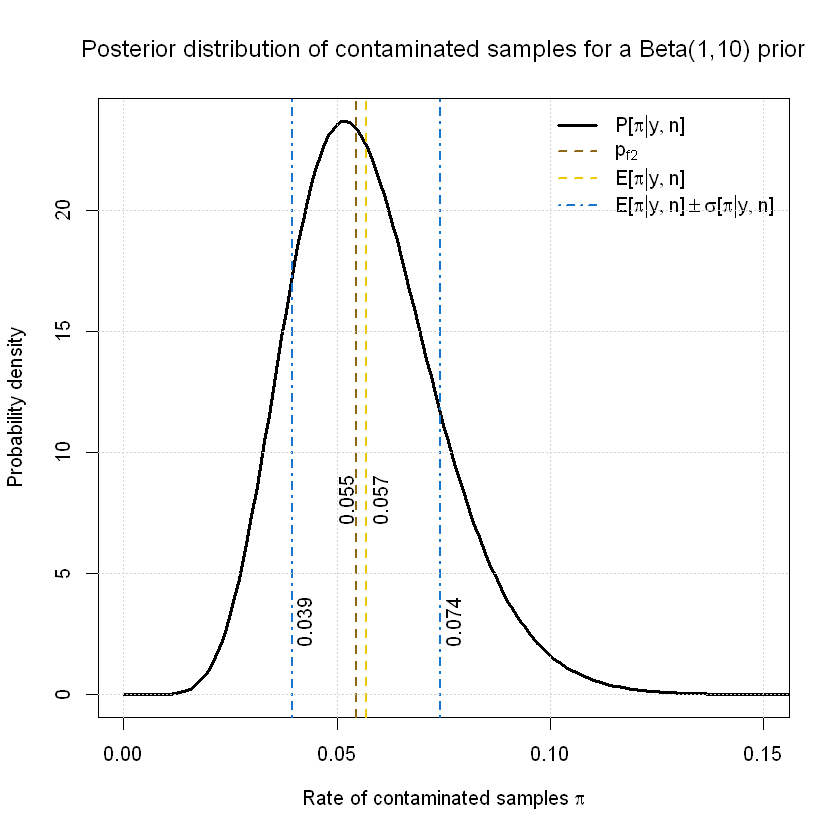

In [19]:
#Assuming the prior to be another Beta function with parameters alpha_p = 1 and beta_p = 10, the posterior is again represented by the (conjugate) Beta function with parameters alpha_c = alpha_p + y and beta_c = beta_p + n - y

alpha_c2 <- alpha_p + y2
beta_c2 <- beta_p + n2 - y2

mean_c2 <- alpha_c2 / (alpha_c2 + beta_c2)
var_c2 <- (alpha_c2 * beta_c2) / (((alpha_c2 + beta_c2)^2) * (alpha_c2 + beta_c2 + 1))
std_c2 <- sqrt(var_c2)
ci_l_c2 <- qbeta(0.025, alpha_c2, beta_c2)
ci_r_c2 <- qbeta(0.975, alpha_c2, beta_c2)

x <- seq(0, 1, 0.001)

plot(x, dbeta(x, alpha_c2, beta_c2), type='l', 
     xlab=TeX('Rate of contaminated samples $\\pi$'), ylab='Probability density', 
     main=TeX('Posterior distribution of contaminated samples for a Beta(1,10) prior'), 
     xlim=c(0, 0.15), col='black', lwd=3)
abline(v=p_f2, lwd=2, col='goldenrod4', lty=2)
abline(v=mean_c2, lwd=2, col='gold2', lty=2)
abline(v=mean_c2 - std_c2, lwd=2, col='dodgerblue3', lty=4)
abline(v=mean_c2 + std_c2, lwd=2, col='dodgerblue3', lty=4)
legend('topright', legend=c(TeX('$P \\[ \\pi | y, n \\]$'), TeX('$p_{f2}$'), TeX('$E \\[ \\pi | y, n \\]$'), TeX('$E \\[ \\pi | y, n \\] \\pm \\sigma \\[ \\pi | y, n\\]$')),
       col=c("black", "goldenrod4", "gold2", "dodgerblue3"),
       lty=c(1, 2, 2, 4), lwd=c(3, 2, 2, 2), bty = "n", cex=1)
grid()
text(x=round(p_f2, 3)-0.003, y=8, round(p_f2, 3), srt=90)
text(x=round(mean_c2, 3)+0.003, y=8, round(mean_c2, 3), srt=90)
text(x=round(mean_c2 - std_c2, 3)+0.003, y=3, round(mean_c2 - std_c2, 3), srt=90)
text(x=round(mean_c2 + std_c2, 3)+0.003, y=3, round(mean_c2 + std_c2, 3), srt=90)

In [20]:
cat("===================================================\n")
cat("SUMMARY OF CALCULATED RESULTS FOR BETA(1,10) PRIOR")
cat("\n===================================================\n")
cat("Mean of the posterior (in our convention coincides with the Bayesian estimator of p): ", round(mean_c2, 3))
cat("\nVariance: ", round(var_c2, 4))
cat("\nStandard deviation: ", round(std_c2, 3))
cat("\n95% credibility interval: [", round(ci_l_c2, 3), ":", round(ci_r_c2, 3), "]")

SUMMARY OF CALCULATED RESULTS FOR BETA(1,10) PRIOR
Mean of the posterior (in our convention coincides with the Bayesian estimator of p):  0.057
Variance:  3e-04
Standard deviation:  0.017
95% credibility interval: [ 0.028 : 0.095 ]

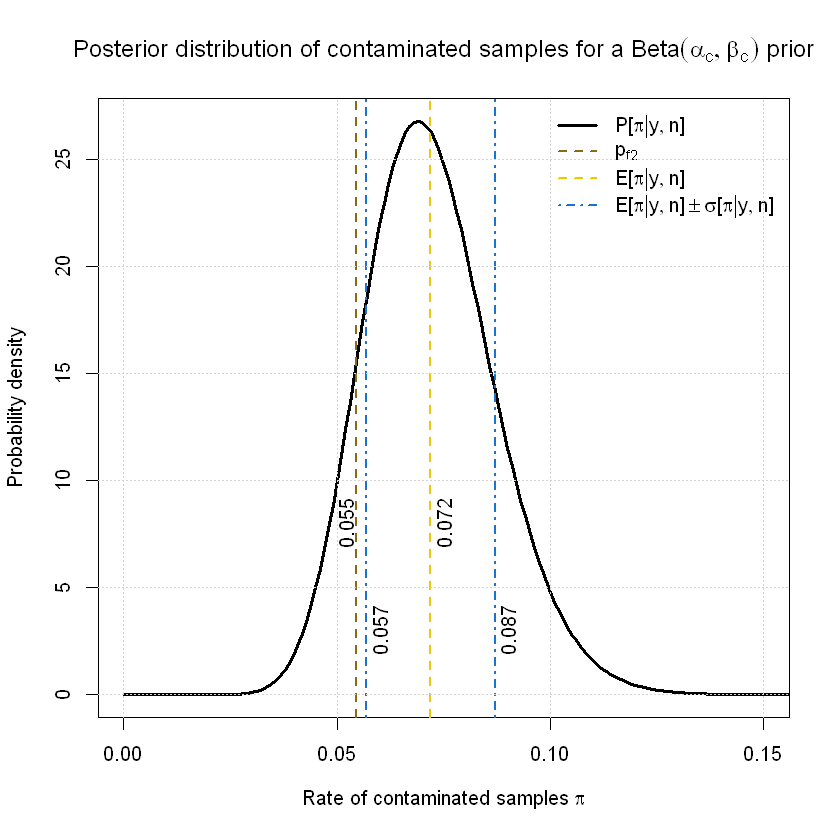

In [21]:
#Assuming the posterior probability of the older measurement to be the prior of the new one (thus, using the previous knowledge on the problem), the new posterior is again represented by a Beta function with parameters alpha_c3 = alpha_c + y2 and beta_c3 = beta_c + n2 - y2 

alpha_c3 <- alpha_c + y2
beta_c3 <- beta_c + n2 - y2

mean_c3 <- alpha_c3 / (alpha_c3 + beta_c3)
var_c3 <- (alpha_c3 * beta_c3) / (((alpha_c3 + beta_c3)^2) * (alpha_c3 + beta_c3 + 1))
std_c3 <- sqrt(var_c3)
ci_l_c3 <- qbeta(0.025, alpha_c3, beta_c3)
ci_r_c3 <- qbeta(0.975, alpha_c3, beta_c3)

plot(x, dbeta(x, alpha_c3, beta_c3), type='l', 
     xlab=TeX('Rate of contaminated samples $\\pi$'), ylab='Probability density', 
     main=TeX('Posterior distribution of contaminated samples for a Beta$(\\alpha_c, \\beta_c)$ prior'), 
     xlim=c(0, 0.15), col='black', lwd=3)
abline(v=p_f2, lwd=2, col='goldenrod4', lty=2)
abline(v=mean_c3, lwd=2, col='gold2', lty=2)
abline(v=mean_c3 - std_c3, lwd=2, col='dodgerblue3', lty=4)
abline(v=mean_c3 + std_c3, lwd=2, col='dodgerblue3', lty=4)
legend('topright', legend=c(TeX('$P \\[ \\pi | y, n \\]$'), TeX('$p_{f2}$'), TeX('$E \\[ \\pi | y, n \\]$'), TeX('$E \\[ \\pi | y, n \\] \\pm \\sigma \\[ \\pi | y, n\\]$')),
       col=c("black", "goldenrod4", "gold2", "dodgerblue3"),
       lty=c(1, 2, 2, 4), lwd=c(3, 2, 2, 2), bty = "n", cex=1)
grid()
text(x=round(p_f2, 3)-0.003, y=8, round(p_f2, 3), srt=90)
text(x=round(mean_c3, 3)+0.003, y=8, round(mean_c3, 3), srt=90)
text(x=round(mean_c3 - std_c3, 3)+0.003, y=3, round(mean_c3 - std_c3, 3), srt=90)
text(x=round(mean_c3 + std_c3, 3)+0.003, y=3, round(mean_c3 + std_c3, 3), srt=90)

In [22]:
cat("======================================================\n")
cat("SUMMARY OF CALCULATED RESULTS USING PREVIOUS KNOWLEDGE")
cat("\n======================================================\n")
cat("Mean of the posterior (in our convention coincides with the Bayesian estimator of p): ", round(mean_c3, 3))
cat("\nVariance: ", round(var_c3, 4))
cat("\nStandard deviation: ", round(std_c3, 3))
cat("\n95% credibility interval: [", round(ci_l_c3, 3), ":", round(ci_r_c3, 3), "]")

SUMMARY OF CALCULATED RESULTS USING PREVIOUS KNOWLEDGE
Mean of the posterior (in our convention coincides with the Bayesian estimator of p):  0.072
Variance:  2e-04
Standard deviation:  0.015
95% credibility interval: [ 0.045 : 0.104 ]

In [23]:
#Hypothesis testing, Bayesian approach
#p = probability that water sample is contaminated
#NULL hypothesis H0: p = 0.1
#Alternative hypothesis H1: p != 0.1
#Level of significance fixed at 5%

#It's proper to use a two-sided hypothesis test. With the Bayesian approach it is necessary to just check whether p = 0.1 lies inside the 95% credibility interval

cat("p = ", p, "\n\n")
cat("================\n")
cat("BETA(1,10) PRIOR")
cat("\n================\n")
cat("\n95% credibility interval: [", round(ci_l_c2, 3), ":", round(ci_r_c2, 3), "]\n")
cat("\nThe value of p does not lie inside the 95% credibility interval, thus we can reject the NULL hypothesis at 5% level of significance.\n\n")
cat("==================\n")
cat("PREVIOUS KNOWLEDGE")
cat("\n==================\n")
cat("\n95% credibility interval: [", round(ci_l_c3, 3), ":", round(ci_r_c3, 3), "]\n")
cat("\nThe value of p lies inside the 95% credibility interval, thus we cannot reject the NULL hypothesis at 5% level of significance.\n")

p =  0.1 

BETA(1,10) PRIOR

95% credibility interval: [ 0.028 : 0.095 ]

The value of p does not lie inside the 95% credibility interval, thus we can reject the NULL hypothesis at 5% level of significance.

PREVIOUS KNOWLEDGE

95% credibility interval: [ 0.045 : 0.104 ]

The value of p lies inside the 95% credibility interval, thus we cannot reject the NULL hypothesis at 5% level of significance.


In [25]:
```{r}
#Hypothesis testing, frequentist approach

x <- seq(0, n2)
bins2 <- dbinom(x, n2, p)
l2 <- qbinom(0.025, n2, p)
r2 <- qbinom(0.975, n2, p)
alpha_dis2 <- 1 - sum(dbinom(l2:r2, n2, p))

cat("Keeping into account the discretization of y, the level of significance as close to 5% as possible is: ", round(alpha_dis2 * 100, 3), "%\n\n")

cols2 <- rep('slategray', n2+1)
cols2 <- replace(cols2, seq(min(x), l2+1), 'firebrick1')
cols2 <- replace(cols2, seq(r2+1, max(x)+1), 'firebrick1')

barplot(bins2, names.arg=x, xlab='Number of contaminated samples y', 
        ylab='Probability density', 
        main=TeX('Binomial NULL distribution $Bin ( y | n = 165, p = 0.1 )$'), 
        xlim = c(0, 38), xpd = FALSE, col=cols2)
arrows(11.5, 0.05, 11.5, 0.02, length = 0.25, code=2, lwd=2, col='firebrick1')
text(x=11.5, y=0.06, "y = 9 not\nacceptable")

cat("y2 = 9 lies outside the acceptance region of the graph, thus we reject the NULL hypothesis H0 with the 5% level of significance.")

ERROR: Error in parse(text = x, srcfile = src): tentativo di utilizzo di un nome variabile di lunghezza zero


# EXERCISE 4 

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 1
   Unobserved stochastic nodes: 1
   Total graph size: 15

Initializing model




Iterations = 101001:201000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 1e+05 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

          Mean             SD       Naive SE Time-series SE 
     8.478e-02      3.091e-02      9.775e-05      1.339e-04 

2. Quantiles for each variable:

   2.5%     25%     50%     75%   97.5% 
0.03521 0.06221 0.08126 0.10345 0.15448 


The distribution found for the posterior is equivalent to a Beta(7,76) distribution, as in exercise 1.

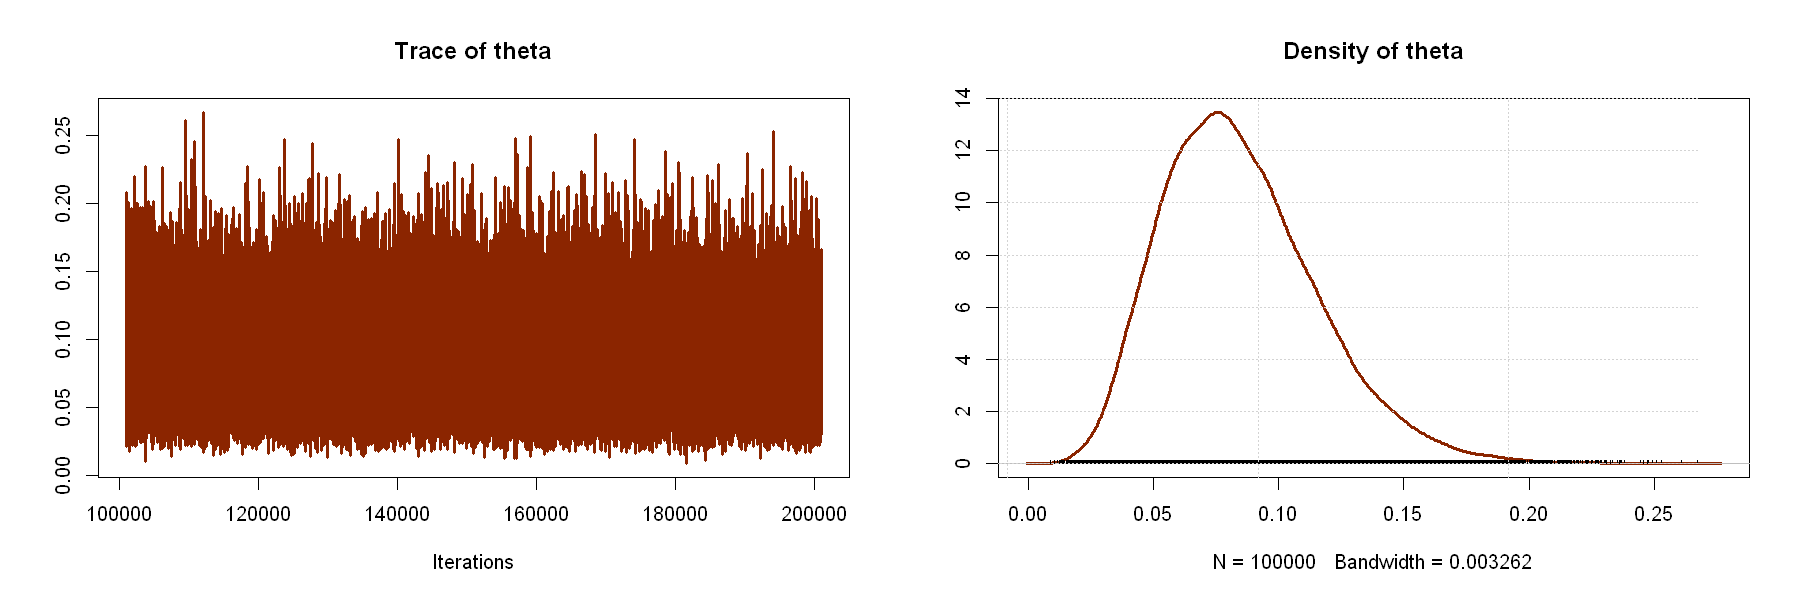

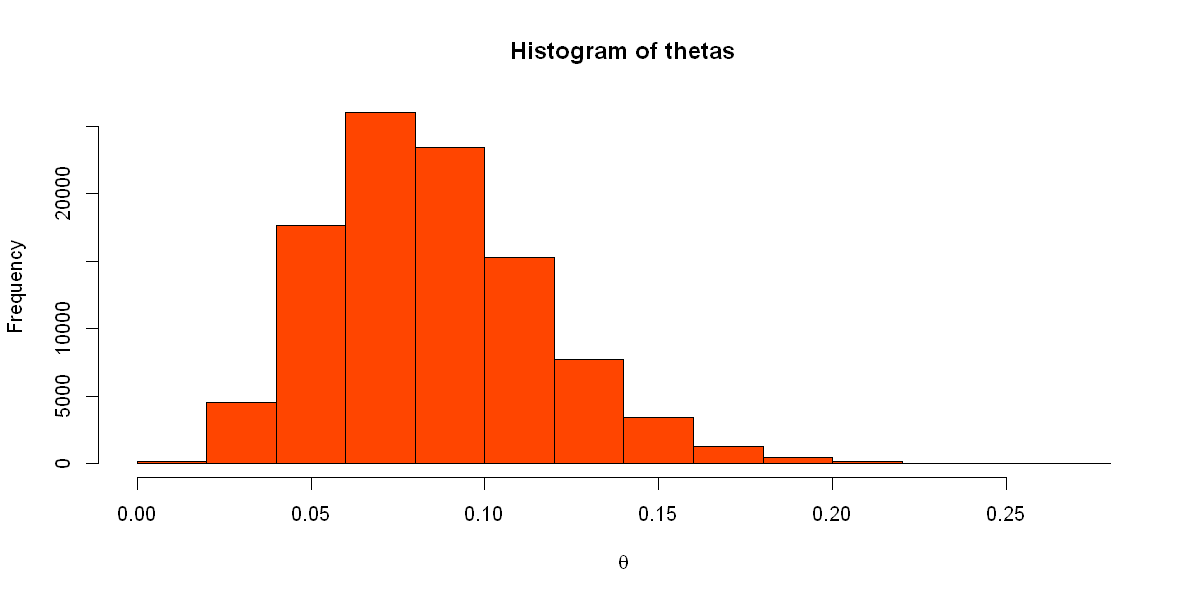

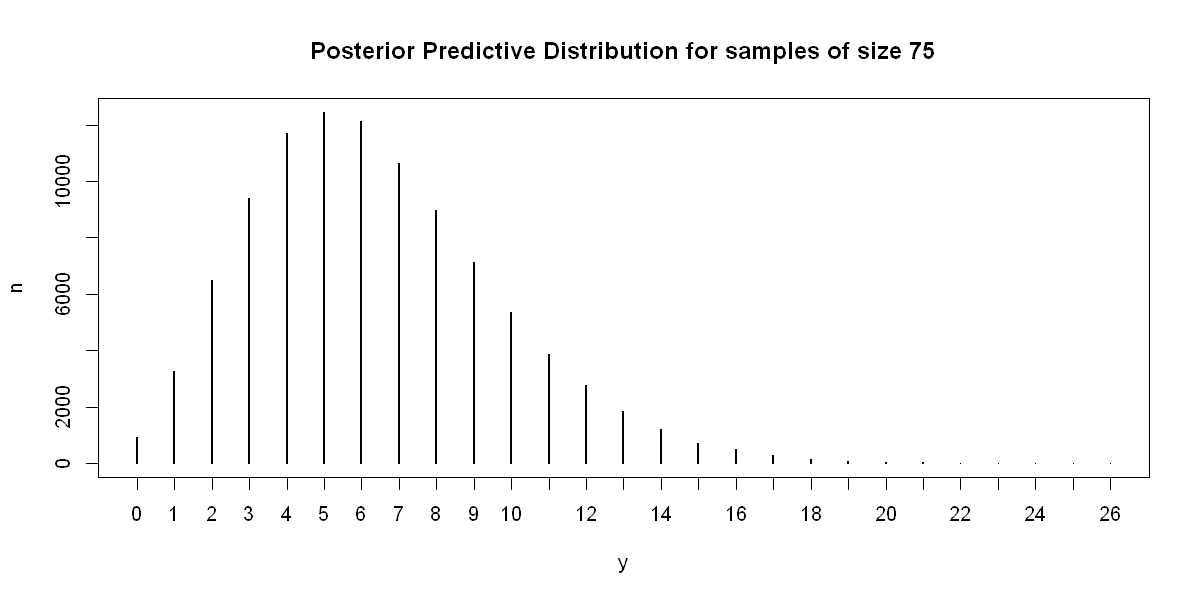

In [26]:
#Load the data
y <- 6
n <- 75

string <- "model{
    # Likelihood
    y ~ dbinom(theta, n)

    # Prior
    theta ~ dbeta(alpha, beta)
    alpha <- ((1-mu)*mu^2)/(std^2)-mu # prior successes
    beta <- alpha/mu - alpha # prior failures
    mu <- 0.15
    std <- 0.14

}"

dataList = list(y = y, n = n)

model <- jags.model(file = textConnection(string), data = dataList)

update(model, n.iter = 100000)
Nrep = 100000 # number of simulations

posterior_sample <- coda.samples(model,
                       variable.names = c("theta"),
                       n.iter = Nrep)

collect <- summary(posterior_sample)
collect
mean_new <- collect$statistics["Mean"]
std_new <- collect$statistics["SD"]

a <- round(((1-mean_new)*mean_new^2)/(std_new^2)-mean_new,digits=0)
b <- round(a/mean_new - a,digits=0)
glue("The distribution found for the posterior is equivalent to a Beta({a},{b}) distribution, as in exercise 1.")

options(repr.plot.width=15, repr.plot.height=5) 
plot(posterior_sample,col="orangered4",lwd=3)
grid()

options(repr.plot.width=10, repr.plot.height=5) 
thetas = as.matrix(posterior_sample,lwd=3)
hist(thetas, col="orangered", xlab=TeX('$\\theta$'))

ynew = rbinom(Nrep, n, thetas)

plot(table(ynew), main = "Posterior Predictive Distribution for samples of size 75",
     xlab = "y", ylab="n")

# EXERCISE 5 

Warning message in jags.model(file = textConnection(model_string1), data = data):
"Unused variable "n" in data"

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 5
   Unobserved stochastic nodes: 1
   Total graph size: 7

Initializing model




Iterations = 10001:20000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

          Mean             SD       Naive SE Time-series SE 
      56.20234        3.37414        0.03374        0.03374 

2. Quantiles for each variable:

 2.5%   25%   50%   75% 97.5% 
49.88 53.88 56.14 58.44 63.03 


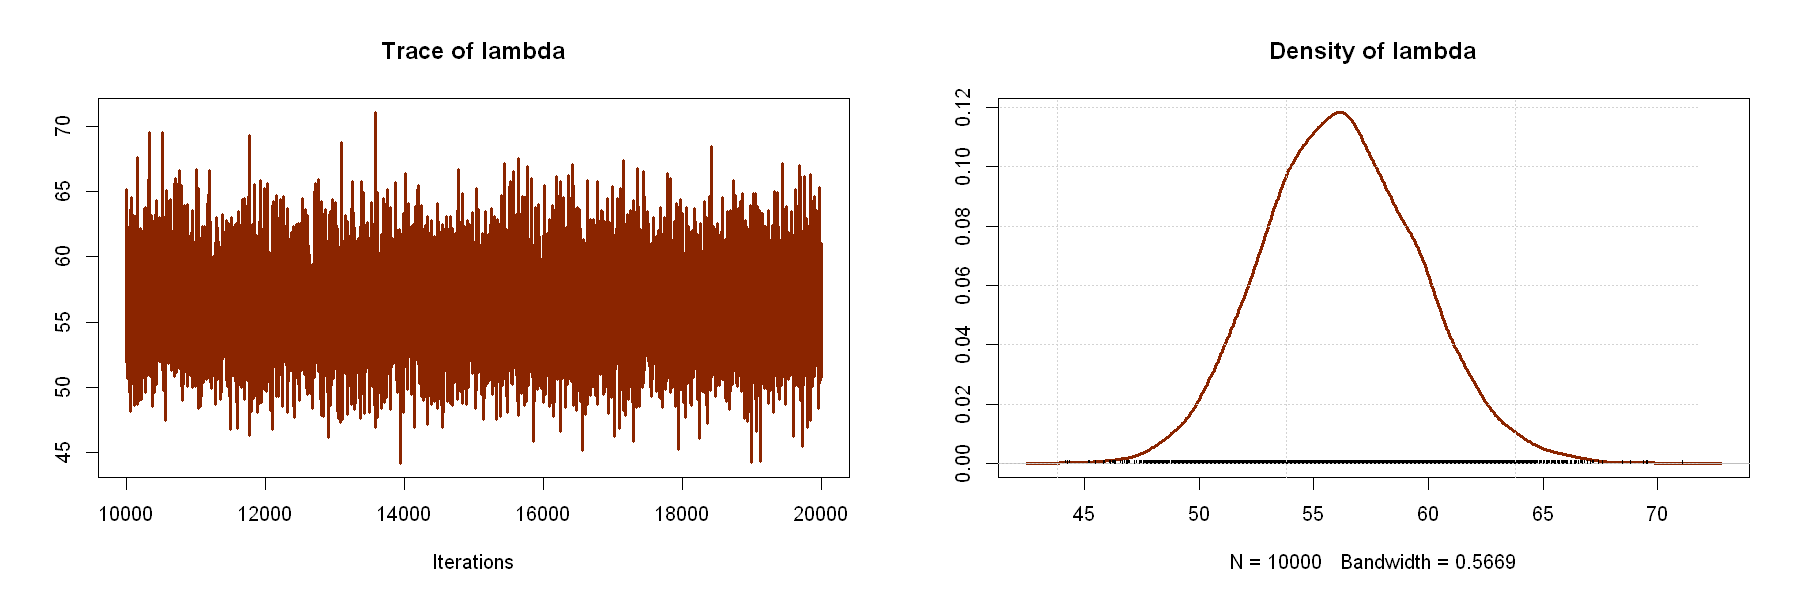

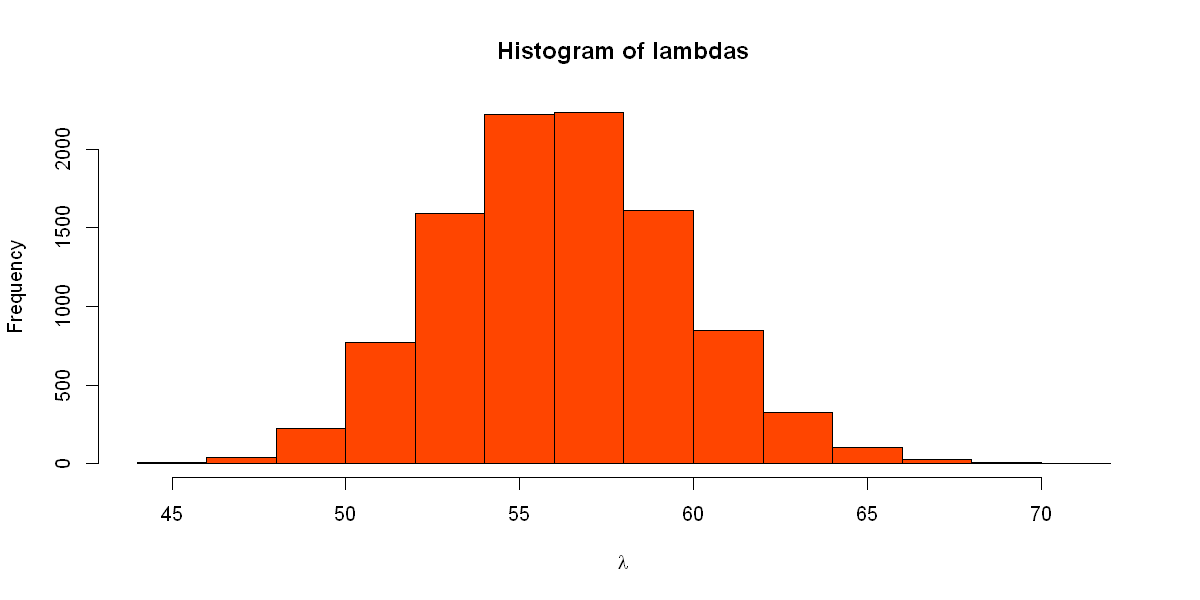

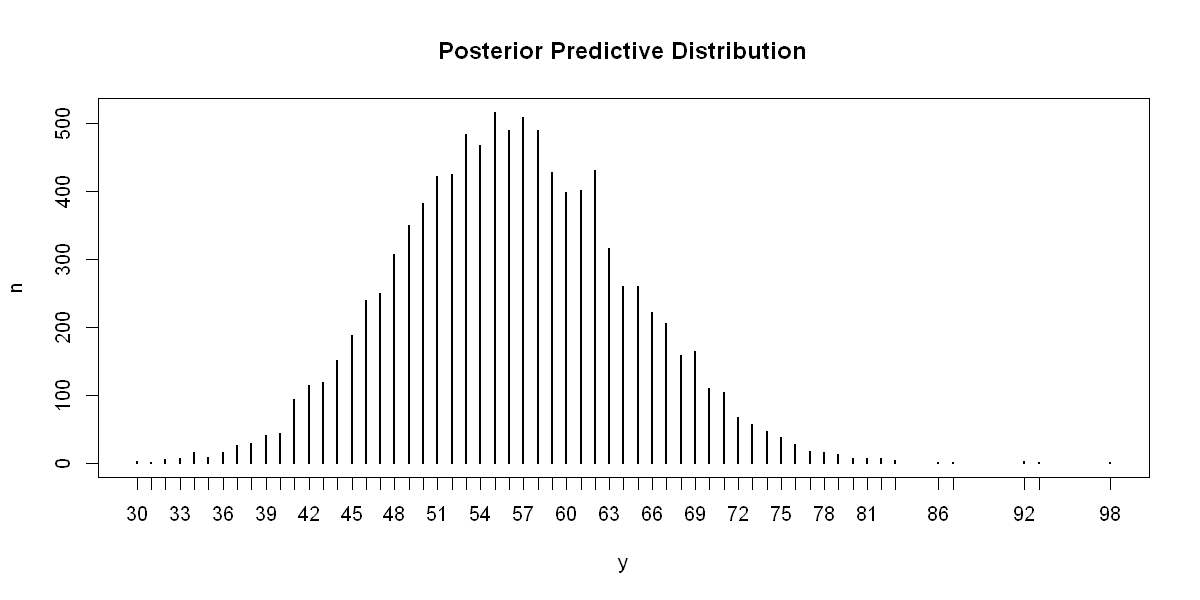

In [27]:
#Uniform prior, first corp

n_death <- c(0, 1, 2, 3, 4)
n1 <- c(109, 65, 22, 3, 1)
n2 <- c(144, 91, 32, 11, 2)

model_string1 <- "model{
    # Likelihood
    for (i in 1:5) {
       X[i] ~ dpois(lambda); 
    }
        
    # Uniform Prior for lambda
    lambda ~ dexp(0.00001);
}"

data <- NULL
data$X <- n2 
data$n <- length(data$X)

model <- jags.model(file = textConnection(model_string1), data = data)

update(model, n.iter = 10000)
Nrep = 10000 # number of simulations

posterior_sample <- coda.samples(model, variable.names = c("lambda"), n.iter = Nrep)

collect <- summary(posterior_sample)
collect
mean_new <- collect$statistics["Mean"]
std_new <- collect$statistics["SD"]
interval1 <- collect$quantiles["2.5%"]
interval2 <- collect$quantiles["97.5%"]

options(repr.plot.width=15, repr.plot.height=5) 
plot(posterior_sample,col="orangered4",lwd=3)
grid()

options(repr.plot.width=10, repr.plot.height=5) 
lambdas = as.matrix(posterior_sample,lwd=3)
hist(lambdas, col="orangered", xlab=TeX('$\\lambda$'))

ynew = rpois(Nrep, lambdas)

plot(table(ynew), main = "Posterior Predictive Distribution", xlab = "y", ylab="n")

Warning message in jags.model(file = textConnection(model_string2), data = data):
"Unused variable "n" in data"

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 5
   Unobserved stochastic nodes: 1
   Total graph size: 7

Initializing model




Iterations = 10001:20000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

          Mean             SD       Naive SE Time-series SE 
       56.1890         3.3703         0.0337         0.0337 

2. Quantiles for each variable:

 2.5%   25%   50%   75% 97.5% 
49.77 53.87 56.14 58.41 63.05 


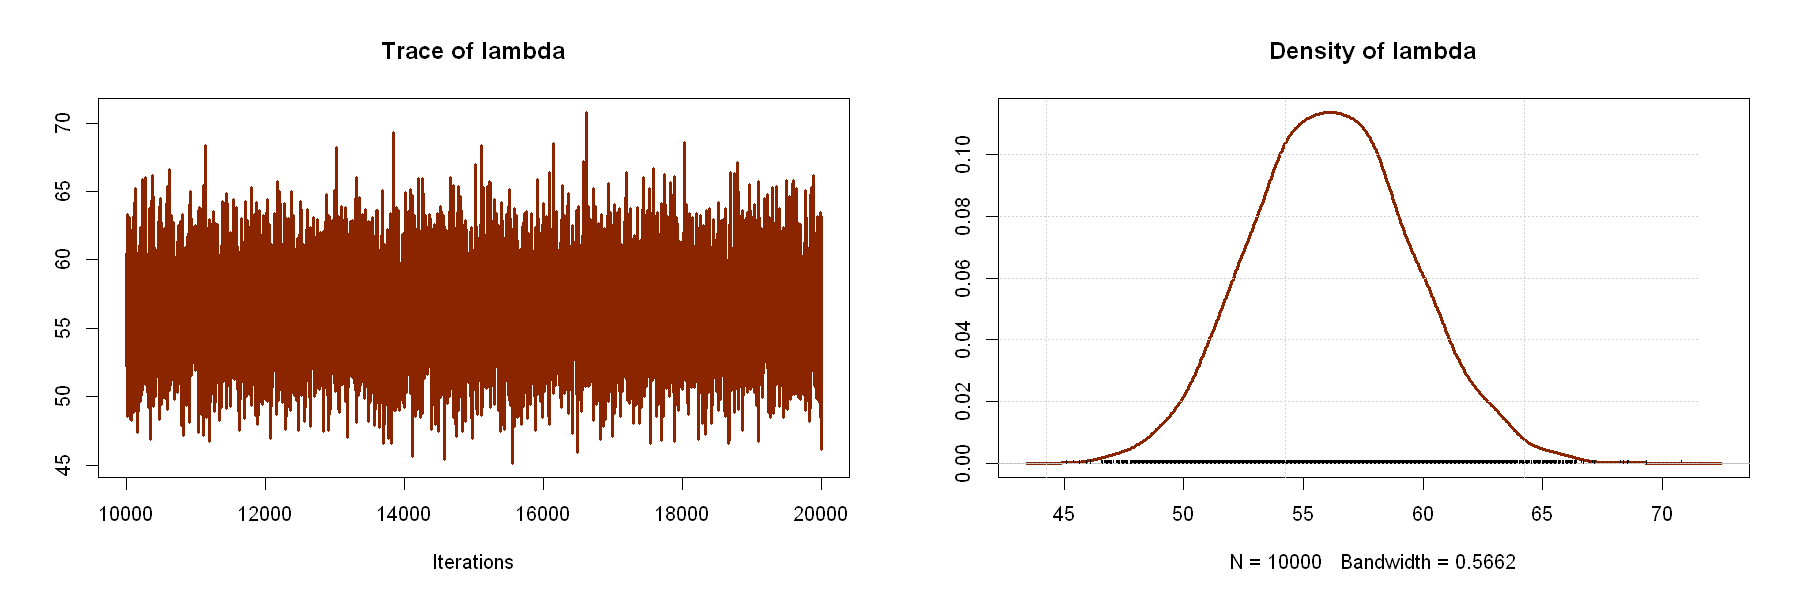

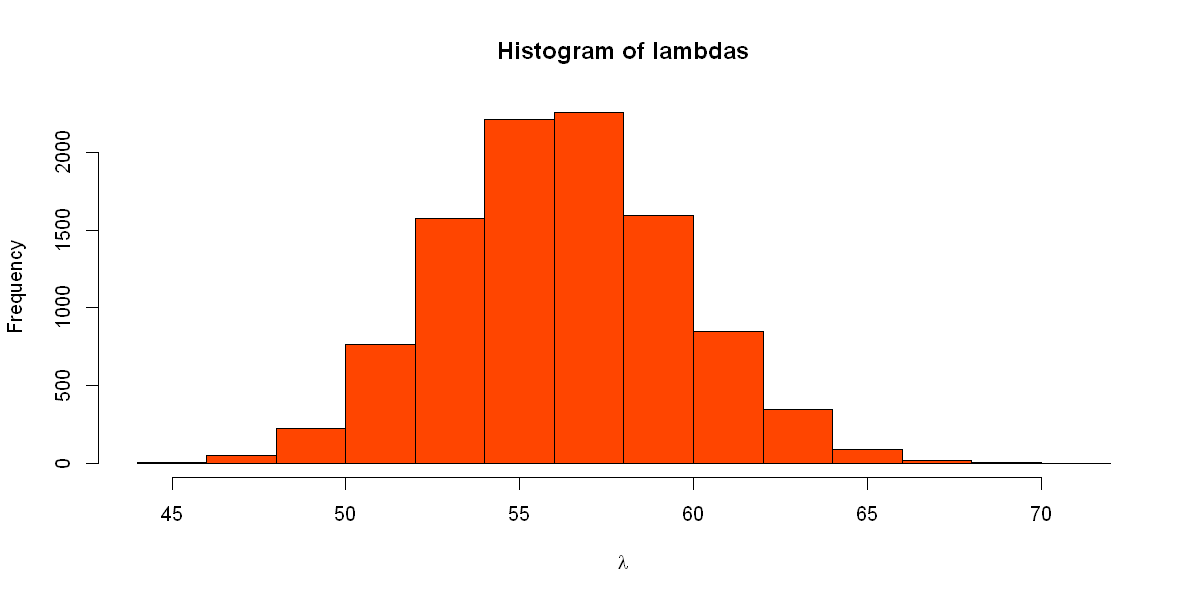

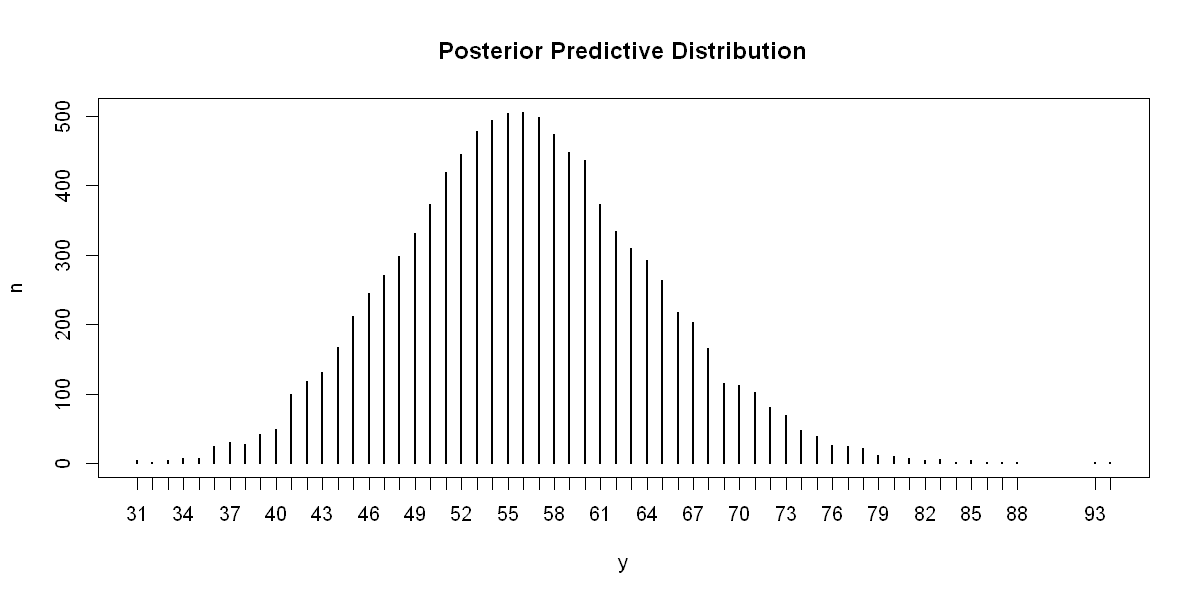

In [28]:
#Uniform prior, second corp

model_string2 <- "model{
    # Likelihood
    for (i in 1:5) {
       X[i] ~ dpois(lambda); 
    }
        
    # Uniform Prior for lambda
    lambda ~ dexp(0.00001);
}"

data <- NULL
data$X <- n2 
data$n <- length(data$X)

model <- jags.model(file = textConnection(model_string2), data = data)

update(model, n.iter = 10000)
Nrep = 10000 # number of simulations

posterior_sample <- coda.samples(model, variable.names = c("lambda"), n.iter = Nrep)

collect <- summary(posterior_sample)
collect
mean_new <- collect$statistics["Mean"]
std_new <- collect$statistics["SD"]
interval1 <- collect$quantiles["2.5%"]
interval2 <- collect$quantiles["97.5%"]

options(repr.plot.width=15, repr.plot.height=5) 
plot(posterior_sample,col="orangered4",lwd=3)
grid()

options(repr.plot.width=10, repr.plot.height=5) 
lambdas = as.matrix(posterior_sample,lwd=3)
hist(lambdas,col="orangered", xlab=TeX('$\\lambda$'))

ynew = rpois(Nrep, lambdas)

plot(table(ynew), main = "Posterior Predictive Distribution", xlab = "y", ylab="n")

Warning message in jags.model(file = textConnection(model_string3), data = data):
"Unused variable "n" in data"

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 5
   Unobserved stochastic nodes: 1
   Total graph size: 7

Initializing model




Iterations = 10001:20000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

          Mean             SD       Naive SE Time-series SE 
       39.9740         2.8603         0.0286         0.0286 

2. Quantiles for each variable:

 2.5%   25%   50%   75% 97.5% 
34.55 38.02 39.88 41.85 45.82 


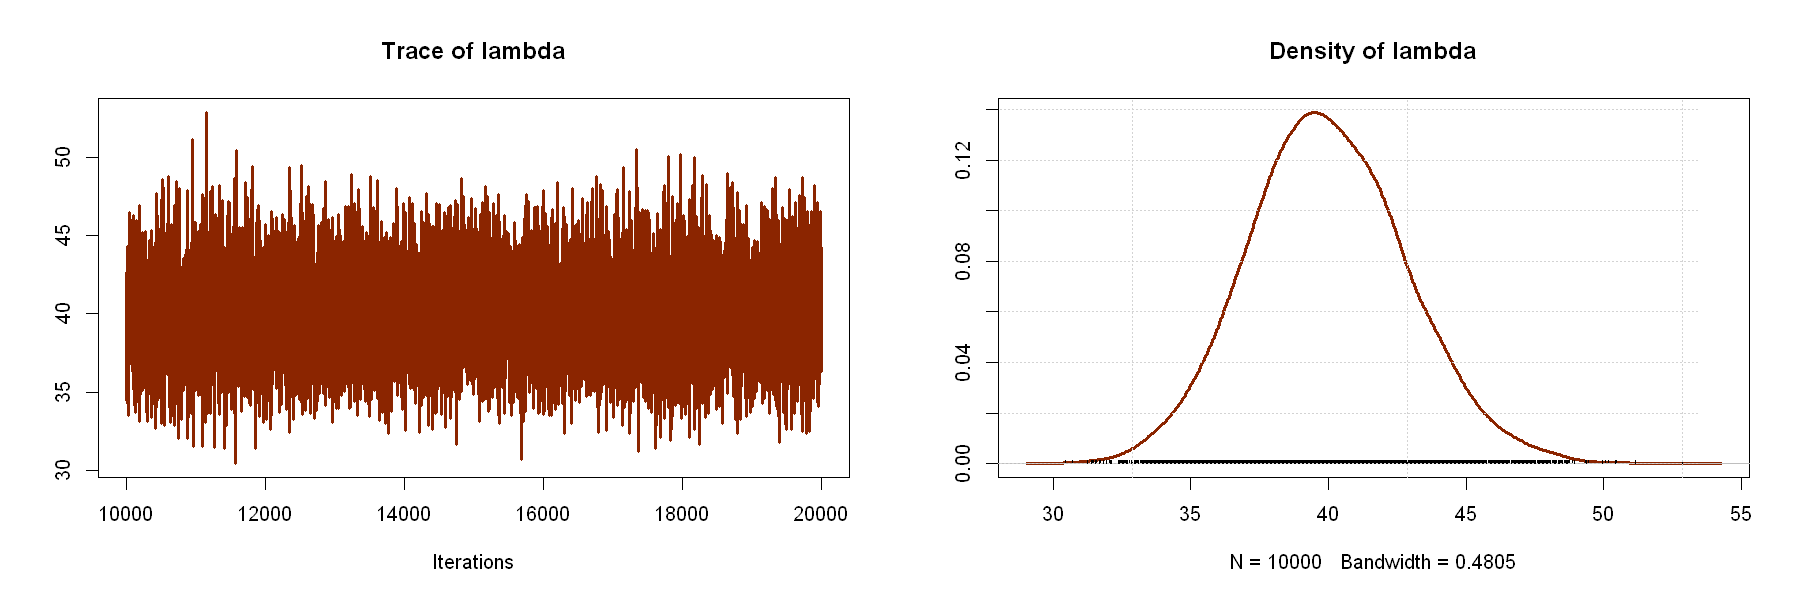

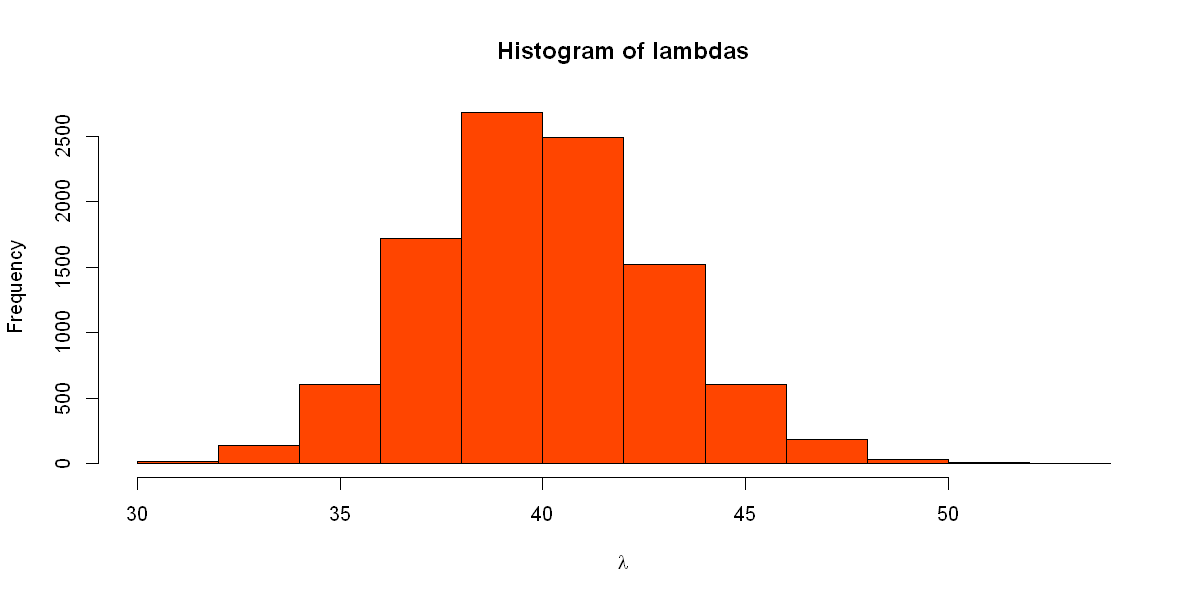

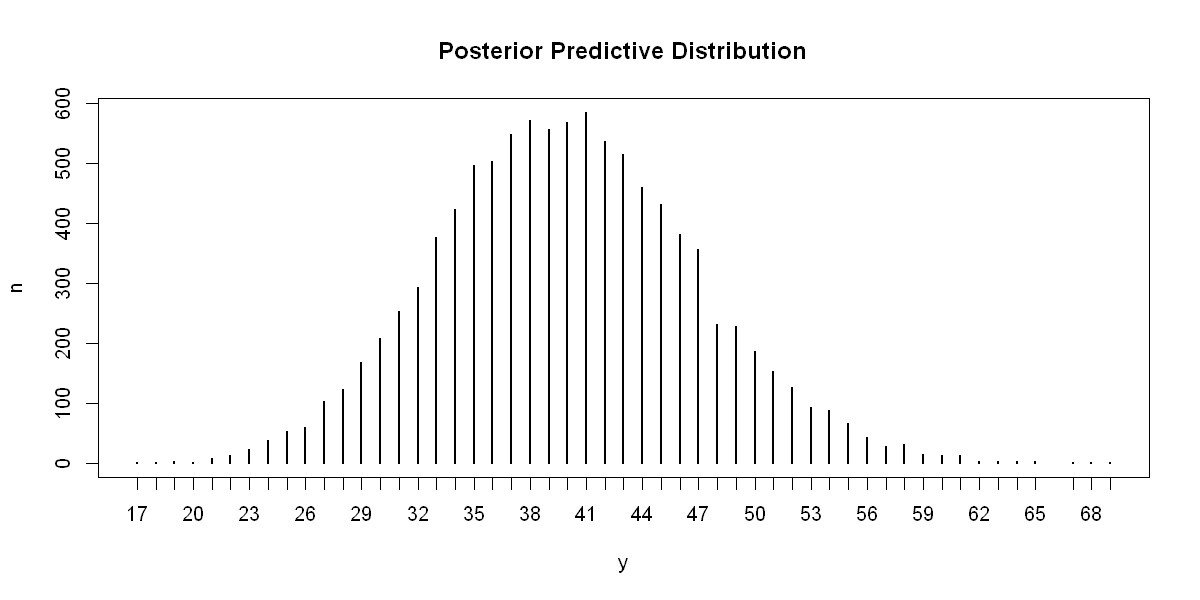

In [29]:
#Jeffrey's prior, first corp

model_string3 <- "model{
    # Likelihood
    for (i in 1:5) {
       X[i] ~ dpois(lambda); 
    }
        
    # Jeffrey's Prior for lambda
    lambda ~ dgamma(0.00001,0.00001);
}"

data <- NULL
data$X <- n1 
data$n <- length(data$X)

model <- jags.model(file = textConnection(model_string3), data = data)

update(model, n.iter = 10000)
Nrep = 10000 # number of simulations

posterior_sample <- coda.samples(model, variable.names = c("lambda"), n.iter = Nrep)

collect <- summary(posterior_sample)
collect
mean_new <- collect$statistics["Mean"]
std_new <- collect$statistics["SD"]
interval1 <- collect$quantiles["2.5%"]
interval2 <- collect$quantiles["97.5%"]

options(repr.plot.width=15, repr.plot.height=5) 
plot(posterior_sample,col="orangered4",lwd=3)
grid()

options(repr.plot.width=10, repr.plot.height=5) 
lambdas = as.matrix(posterior_sample,lwd=3)
hist(lambdas,col="orangered", xlab=TeX('$\\lambda$'))

ynew = rpois(Nrep, lambdas)

plot(table(ynew), main = "Posterior Predictive Distribution", xlab = "y", ylab="n")

Warning message in jags.model(file = textConnection(model_string2), data = data):
"Unused variable "n" in data"

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 5
   Unobserved stochastic nodes: 1
   Total graph size: 7

Initializing model




Iterations = 10001:20000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

          Mean             SD       Naive SE Time-series SE 
      55.99876        3.33605        0.03336        0.03336 

2. Quantiles for each variable:

 2.5%   25%   50%   75% 97.5% 
49.72 53.67 55.95 58.24 62.77 


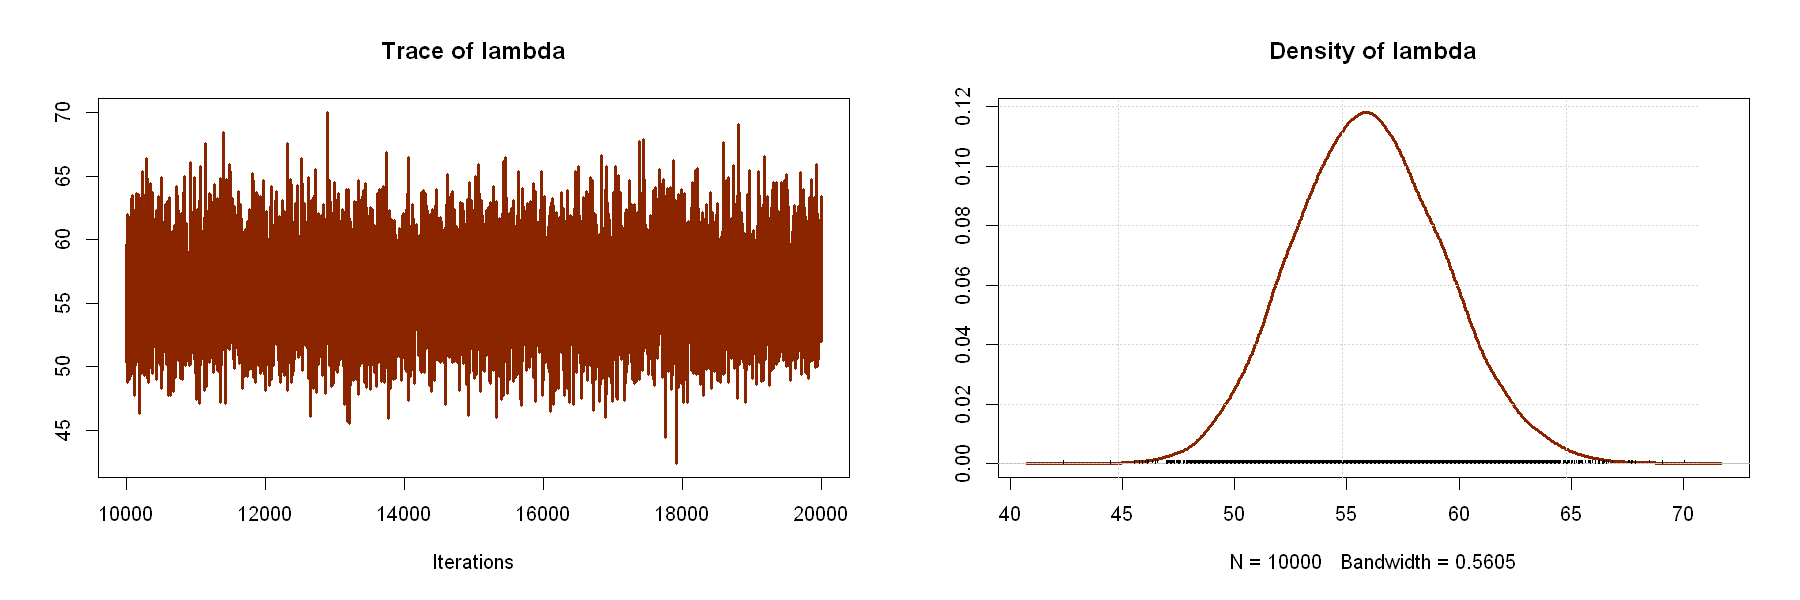

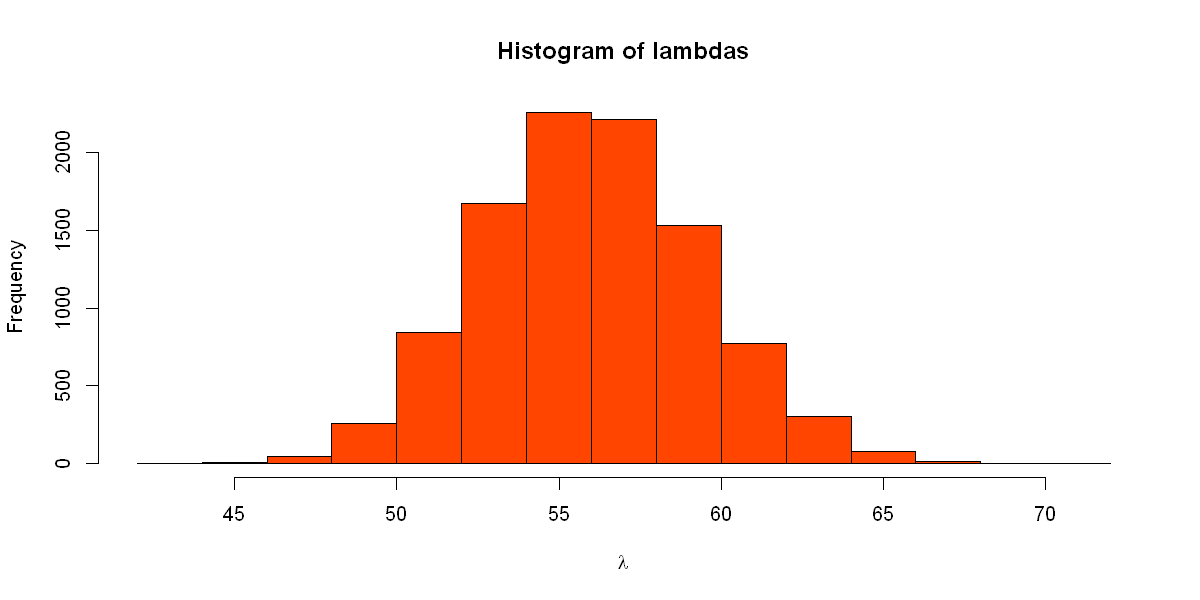

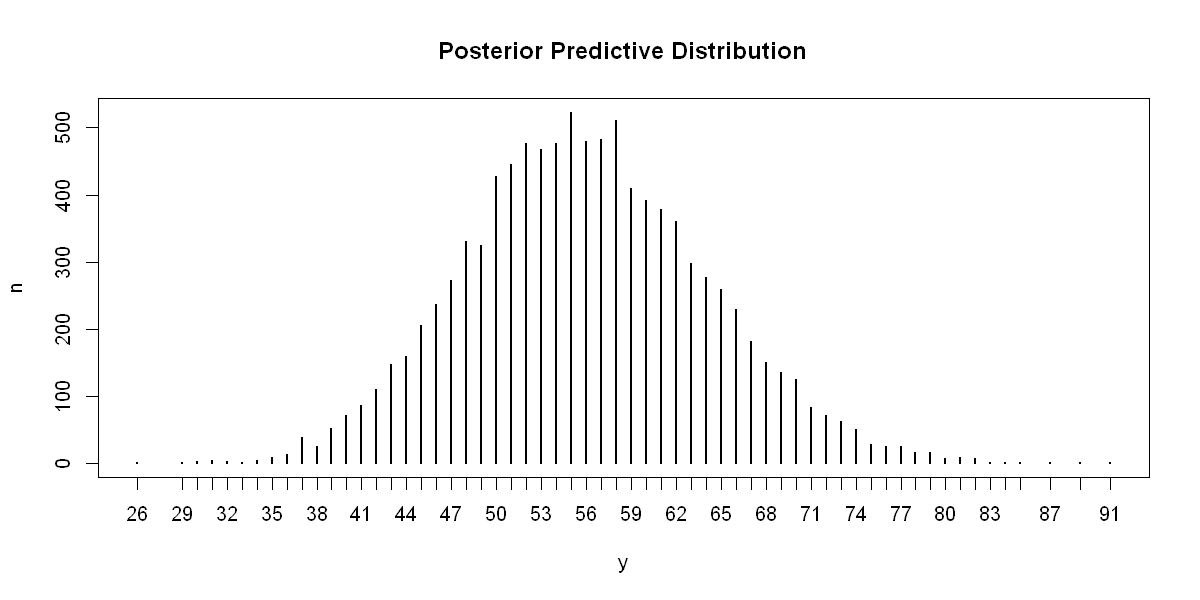

In [30]:
#Jeffrey's prior, second corp

model_string2 <- "model{
    # Likelihood
    for (i in 1:5) {
       X[i] ~ dpois(lambda); 
    }
        
    # Uniform Prior for lambda
    lambda ~ dgamma(0.00001,0.00001);
}"

data <- NULL
data$X <- n2 
data$n <- length(data$X)

model <- jags.model(file = textConnection(model_string2), data = data)

update(model, n.iter = 10000)
Nrep = 10000 # number of simulations

posterior_sample <- coda.samples(model, variable.names = c("lambda"), n.iter = Nrep)

collect <- summary(posterior_sample)
collect
mean_new <- collect$statistics["Mean"]
std_new <- collect$statistics["SD"]
interval1 <- collect$quantiles["2.5%"]
interval2 <- collect$quantiles["97.5%"]

options(repr.plot.width=15, repr.plot.height=5) 
plot(posterior_sample,col="orangered4",lwd=3)
grid()

options(repr.plot.width=10, repr.plot.height=5) 
lambdas = as.matrix(posterior_sample,lwd=3)
hist(lambdas,col="orangered", xlab=TeX('$\\lambda$'))

ynew = rpois(Nrep, lambdas)

plot(table(ynew), main = "Posterior Predictive Distribution", xlab = "y", ylab="n")

# EXERCISE 6 

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 1
   Unobserved stochastic nodes: 1
   Total graph size: 5

Initializing model




Iterations = 11001:111000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 1e+05 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

          Mean             SD       Naive SE Time-series SE 
     9.455e-02      2.593e-02      8.201e-05      1.081e-04 

2. Quantiles for each variable:

   2.5%     25%     50%     75%   97.5% 
0.05014 0.07606 0.09239 0.11061 0.15114 


The distribution found for the posterior is equivalent to a Beta(12,115) distribution, as in exercise 3.

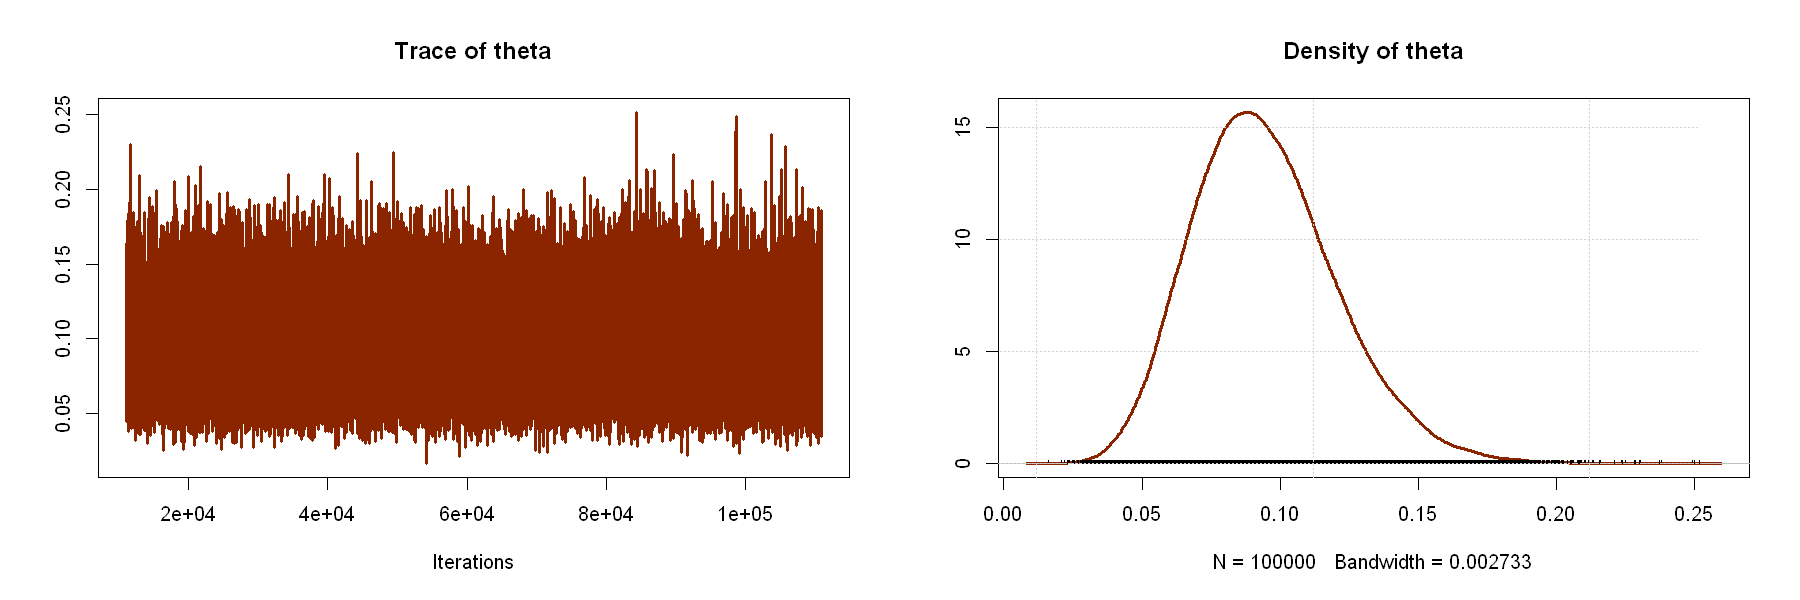

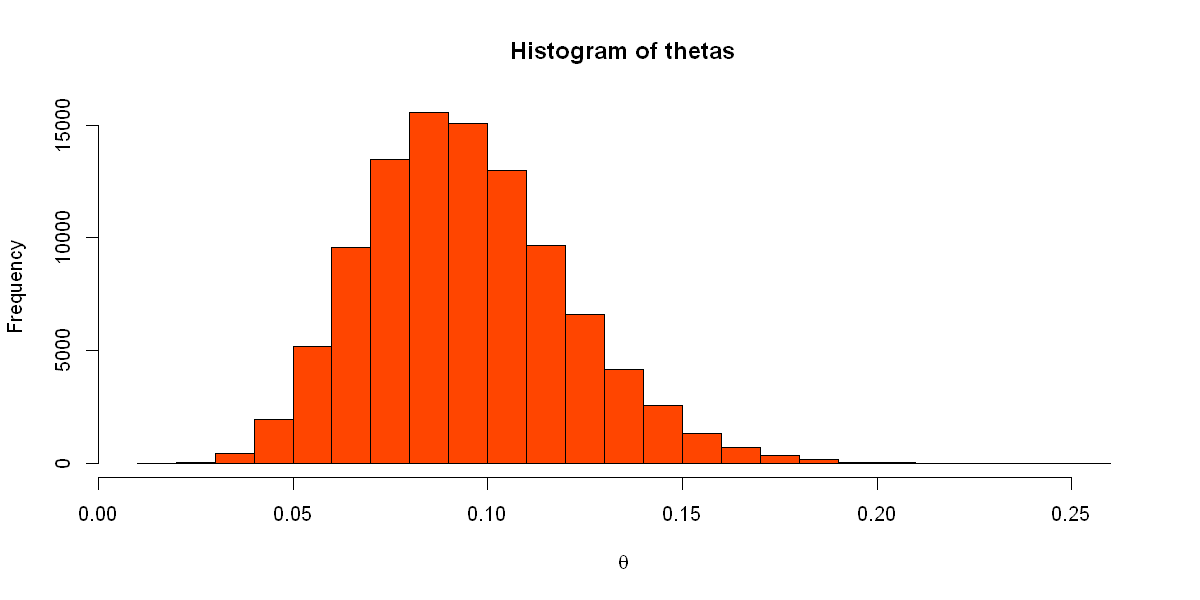

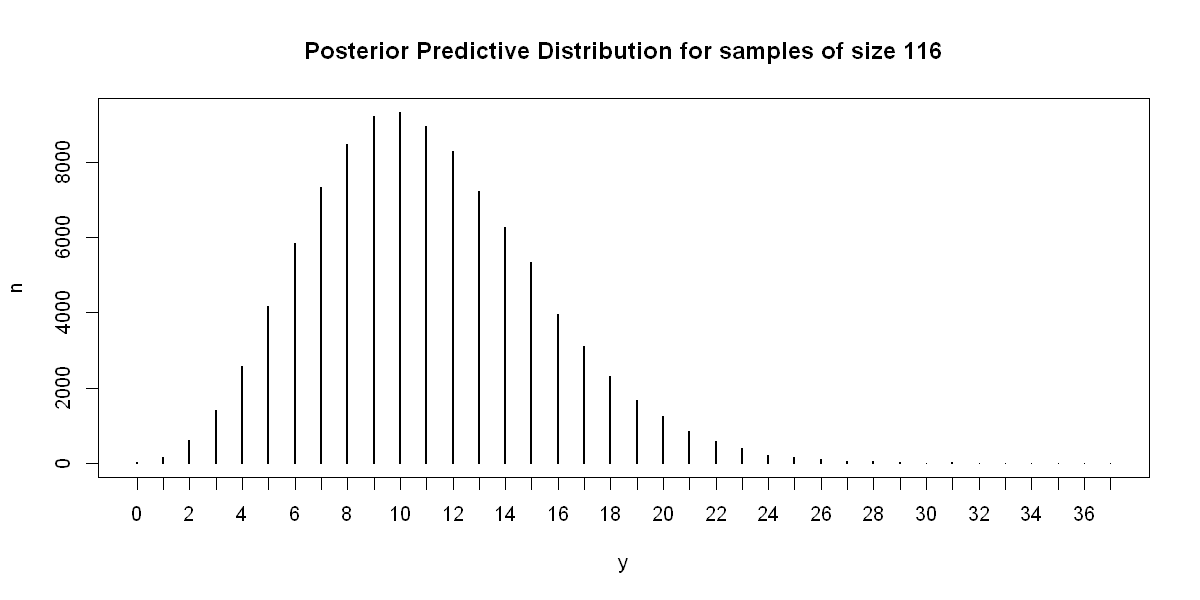

In [31]:
y <- 11
n <- 116

model_string <- "model{

  # Likelihood
  y ~ dbinom(theta, n)

  # Prior
  theta ~ dbeta(alpha, beta)
  alpha <- 1 # prior successes
  beta <- 10 # prior failures

}"

dataList = list(y = y, n = n)

model <- jags.model(file = textConnection(model_string), data = dataList)

update(model, n.iter = 10000)
Nrep = 100000 # number of simulations

posterior_sample <- coda.samples(model, variable.names = c("theta"), n.iter = Nrep)

collect <- summary(posterior_sample)
collect
mean_new <- collect$statistics["Mean"]
std_new <- collect$statistics["SD"]
interval1 <- collect$quantiles["2.5%"]
interval2 <- collect$quantiles["97.5%"]

a <- round(((1-mean_new)*mean_new^2)/(std_new^2)-mean_new,digits=0)
b <- round(a/mean_new - a,digits=0)
glue("The distribution found for the posterior is equivalent to a Beta({a},{b}) distribution, as in exercise 3.")

options(repr.plot.width=15, repr.plot.height=5) 
plot(posterior_sample,col="orangered4",lwd=3)
grid()

options(repr.plot.width=10, repr.plot.height=5) 
thetas = as.matrix(posterior_sample,lwd=3)
hist(thetas,col="orangered", xlab=TeX('$\\theta$'))

ynew = rbinom(Nrep, n, thetas)

plot(table(ynew), main = "Posterior Predictive Distribution for samples of size 116",
     xlab = "y", ylab="n")